## Problem Statement

### Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.).



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost.
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models.
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
# !pip install pandas==1.5.3 numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 imbalanced-learn==0.10.1 xgboost==2.0.3 threadpoolctl==3.3.0 -q --user

**Note:** After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
)
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    confusion_matrix,
)

from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    cross_val_score,
    GridSearchCV,
    RandomizedSearchCV,
)

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Model Tuning/Project 6/Train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Model Tuning/Project 6/Test.csv')

## Data Overview

- Observations
- Sanity checks

### Check Training data

In [5]:
# Check the first few rows
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.464606,-4.679129,3.101546,0.506130,-0.221083,-2.032511,-2.910870,0.050714,-1.522351,3.761892,...,3.059700,-1.690440,2.846296,2.235198,6.667486,0.443809,-2.369169,2.950578,-3.480324,0
1,3.365912,3.653381,0.909671,-1.367528,0.332016,2.358938,0.732600,-4.332135,0.565695,-0.101080,...,-1.795474,3.032780,-2.467514,1.894599,-2.297780,-1.731048,5.908837,-0.386345,0.616242,0
2,-3.831843,-5.824444,0.634031,-2.418815,-1.773827,1.016824,-2.098941,-3.173204,-2.081860,5.392621,...,-0.257101,0.803550,4.086219,2.292138,5.360850,0.351993,2.940021,3.839160,-4.309402,0
3,1.618098,1.888342,7.046143,-1.147285,0.083080,-1.529780,0.207309,-2.493629,0.344926,2.118578,...,-3.584425,-2.577474,1.363769,0.622714,5.550100,-1.526796,0.138853,3.101430,-1.277378,0
4,-0.111440,3.872488,-3.758361,-2.982897,3.792714,0.544960,0.205433,4.848994,-1.854920,-6.220023,...,8.265896,6.629213,-10.068689,1.222987,-3.229763,1.686909,-2.163896,-3.644622,6.510338,0


In [6]:
# Check the last few rows
df.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
19995,-2.071318,-1.088279,-0.796174,-3.011720,-2.287540,2.807310,0.481428,0.105171,-0.586599,-2.899398,...,-8.273996,5.745013,0.589014,-0.649988,-3.043174,2.216461,0.608723,0.178193,2.927755,1
19996,2.890264,2.483069,5.643919,0.937053,-1.380870,0.412051,-1.593386,-5.762498,2.150096,0.272302,...,-4.159092,1.181466,-0.742412,5.368979,-0.693028,-1.668971,3.659954,0.819863,-1.987265,0
19997,-3.896979,-3.942407,-0.351364,-2.417462,1.107546,-1.527623,-3.519882,2.054792,-0.233996,-0.357687,...,7.112162,1.476080,-3.953710,1.855555,5.029209,2.082588,-6.409304,1.477138,-0.874148,0
19998,-3.187322,-10.051662,5.695955,-4.370053,-5.354758,-1.873044,-3.947210,0.679420,-2.389254,5.456756,...,0.402812,3.163661,3.752095,8.529894,8.450626,0.203958,-7.129918,4.249394,-6.112267,0
19999,-2.686903,1.961187,6.137088,2.600133,2.657241,-4.290882,-2.344267,0.974004,-1.027462,0.497421,...,6.620811,-1.988786,-1.348901,3.951801,5.449706,-0.455411,-2.202056,1.678229,-1.974413,0


In [7]:
# Check the shape of dataset
df.shape

(20000, 41)

- The training dataset has 20000 rows and 41 rows.

In [8]:
# Check the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

- The dataset has 41 variables with 40 features and 1 target variable.
- All the variables are numerical type.
- V1 and V2 have a few missing values.

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,19982.0,-0.271996,3.441625,-11.876451,-2.737146,-0.747917,1.840112,15.493002
V2,19982.0,0.440430,3.150784,-12.319951,-1.640674,0.471536,2.543967,13.089269
V3,20000.0,2.484699,3.388963,-10.708139,0.206860,2.255786,4.566165,17.090919
V4,20000.0,-0.083152,3.431595,-15.082052,-2.347660,-0.135241,2.130615,13.236381
V5,20000.0,-0.053752,2.104801,-8.603361,-1.535607,-0.101952,1.340480,8.133797
V6,20000.0,-0.995443,2.040970,-10.227147,-2.347238,-1.000515,0.380330,6.975847
V7,20000.0,-0.879325,1.761626,-7.949681,-2.030926,-0.917179,0.223695,8.006091
V8,20000.0,-0.548195,3.295756,-15.657561,-2.642665,-0.389085,1.722965,11.679495
V9,20000.0,-0.016808,2.160568,-8.596313,-1.494973,-0.067597,1.409203,8.137580
V10,20000.0,-0.012998,2.193201,-9.853957,-1.411212,0.100973,1.477045,8.108472


- All the variables from V1 to V40 have both negative and positive values.
- Nearly all the data in variables from V1 to V40 range between -20 to 20.
- The standard deviation for all the variables from V1 to V40 range from 1.65 to 5.5.

In [10]:
# Check the number of each target category
df['Target'].value_counts()

Target
0    18890
1     1110
Name: count, dtype: int64

- There are 18890 data categorized as target 0 (No failure), and 1110 data categorized as target 1 (Failure). This target variable is imbalanced.

In [11]:
# Check the duplicate values
df.duplicated().sum()

0

- No data is duplicated.

In [12]:
# Check the missing values
df.isnull().sum()

V1        18
V2        18
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

- As noted earlier, there are 18 missing values in variables V1 and V2, respectively.

### Check Testing data

In [13]:
df_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-0.613489,-3.819640,2.202302,1.300420,-1.184929,-4.495964,-1.835817,4.722989,1.206140,-0.341909,...,2.291204,-5.411388,0.870073,0.574479,4.157191,1.428093,-10.511342,0.454664,-1.448363,0
1,0.389608,-0.512341,0.527053,-2.576776,-1.016766,2.235112,-0.441301,-4.405744,-0.332869,1.966794,...,-2.474936,2.493582,0.315165,2.059288,0.683859,-0.485452,5.128350,1.720744,-1.488235,0
2,-0.874861,-0.640632,4.084202,-1.590454,0.525855,-1.957592,-0.695367,1.347309,-1.732348,0.466500,...,-1.318888,-2.997464,0.459664,0.619774,5.631504,1.323512,-1.752154,1.808302,1.675748,0
3,0.238384,1.458607,4.014528,2.534478,1.196987,-3.117330,-0.924035,0.269493,1.322436,0.702345,...,3.517918,-3.074085,-0.284220,0.954576,3.029331,-1.367198,-3.412140,0.906000,-2.450889,0
4,5.828225,2.768260,-1.234530,2.809264,-1.641648,-1.406698,0.568643,0.965043,1.918379,-2.774855,...,1.773841,-1.501573,-2.226702,4.776830,-6.559698,-0.805551,-0.276007,-3.858207,-0.537694,0


In [14]:
df_test.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
4995,-5.120451,1.634804,1.251259,4.035944,3.291204,-2.932230,-1.328662,1.754066,-2.984586,1.248633,...,9.979118,0.063438,0.217281,3.036388,2.109323,-0.557433,1.938718,0.512674,-2.694194,0
4996,-5.172498,1.171653,1.579105,1.219922,2.529627,-0.668648,-2.618321,-2.000545,0.633791,-0.578938,...,4.423900,2.603811,-2.152170,0.917401,2.156586,0.466963,0.470120,2.196756,-2.376515,0
4997,-1.114136,-0.403576,-1.764875,-5.879475,3.571558,3.710802,-2.482952,-0.307614,-0.921945,-2.999141,...,3.791778,7.481506,-10.061396,-0.387166,1.848509,1.818248,-1.245633,-1.260876,7.474682,0
4998,-1.703241,0.614650,6.220503,-0.104132,0.955916,-3.278706,-1.633855,-0.103936,1.388152,-1.065622,...,-4.100352,-5.949325,0.550372,-1.573640,6.823936,2.139307,-4.036164,3.436051,0.579249,0
4999,-0.603701,0.959550,-0.720995,8.229574,-1.815610,-2.275547,-2.574524,-1.041479,4.129645,-2.731288,...,2.369776,-1.062408,0.790772,4.951955,-7.440825,-0.069506,-0.918083,-2.291154,-5.362891,0


In [15]:
# Check the shape
df_test.shape

(5000, 41)

- The test dataset has 5000 rows and 41 columns.

In [16]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      4995 non-null   float64
 1   V2      4994 non-null   float64
 2   V3      5000 non-null   float64
 3   V4      5000 non-null   float64
 4   V5      5000 non-null   float64
 5   V6      5000 non-null   float64
 6   V7      5000 non-null   float64
 7   V8      5000 non-null   float64
 8   V9      5000 non-null   float64
 9   V10     5000 non-null   float64
 10  V11     5000 non-null   float64
 11  V12     5000 non-null   float64
 12  V13     5000 non-null   float64
 13  V14     5000 non-null   float64
 14  V15     5000 non-null   float64
 15  V16     5000 non-null   float64
 16  V17     5000 non-null   float64
 17  V18     5000 non-null   float64
 18  V19     5000 non-null   float64
 19  V20     5000 non-null   float64
 20  V21     5000 non-null   float64
 21  V22     5000 non-null   float64
 22  

- The features in test data are the same as the training data. Same as the training data, a few data are missing in V1 and V2.

In [17]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,4995.0,-0.277622,3.466280,-12.381696,-2.743691,-0.764767,1.831313,13.504352
V2,4994.0,0.397928,3.139562,-10.716179,-1.649211,0.427369,2.444486,14.079073
V3,5000.0,2.551787,3.326607,-9.237940,0.314931,2.260428,4.587000,15.314503
V4,5000.0,-0.048943,3.413937,-14.682446,-2.292694,-0.145753,2.166468,12.140157
V5,5000.0,-0.080120,2.110870,-7.711569,-1.615238,-0.131890,1.341197,7.672835
V6,5000.0,-1.042138,2.005444,-8.924196,-2.368853,-1.048571,0.307555,5.067685
V7,5000.0,-0.907922,1.769017,-8.124230,-2.054259,-0.939695,0.212228,7.616182
V8,5000.0,-0.574592,3.331911,-12.252731,-2.642088,-0.357943,1.712896,10.414722
V9,5000.0,0.030121,2.174139,-6.785495,-1.455712,-0.079891,1.449548,8.850720
V10,5000.0,0.018524,2.145437,-8.170956,-1.353320,0.166292,1.511248,6.598728


In [18]:
df_test['Target'].value_counts()

Target
0    4718
1     282
Name: count, dtype: int64

- The Target in testing data is also imbalanced.

In [19]:
# Check duplicated values
df_test.duplicated().sum()

0

In [20]:
# Check missing data
df_test.isnull().sum()

V1        5
V2        6
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       0
V39       0
V40       0
Target    0
dtype: int64

- V1 and V2 have 5 and 6 missing values, respectively.

## Exploratory Data Analysis (EDA)

### Plotting histograms and boxplots for all the variables

In [21]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Plotting all the features at one go

### Training data

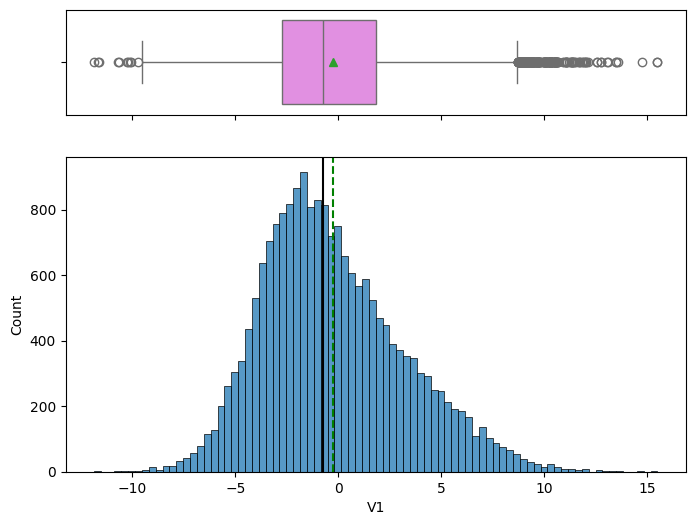

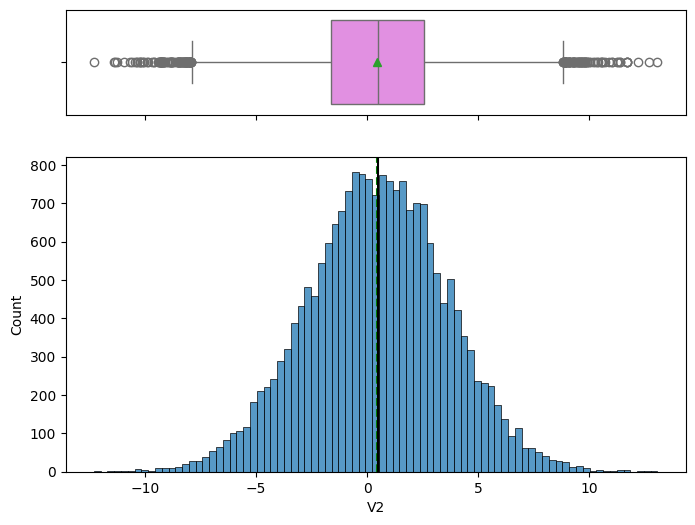

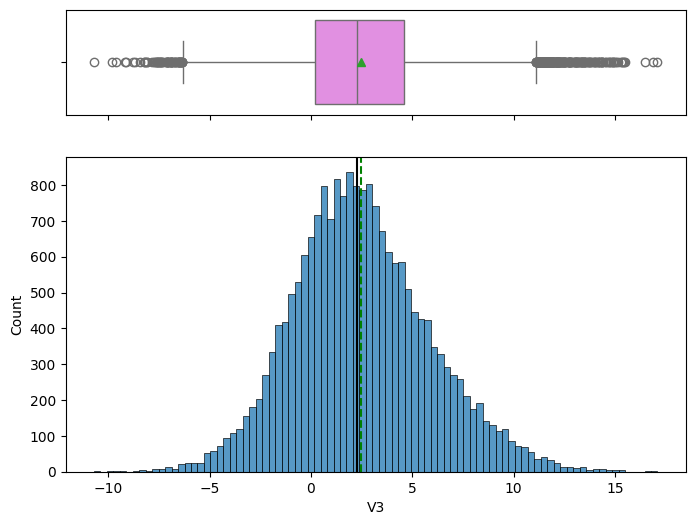

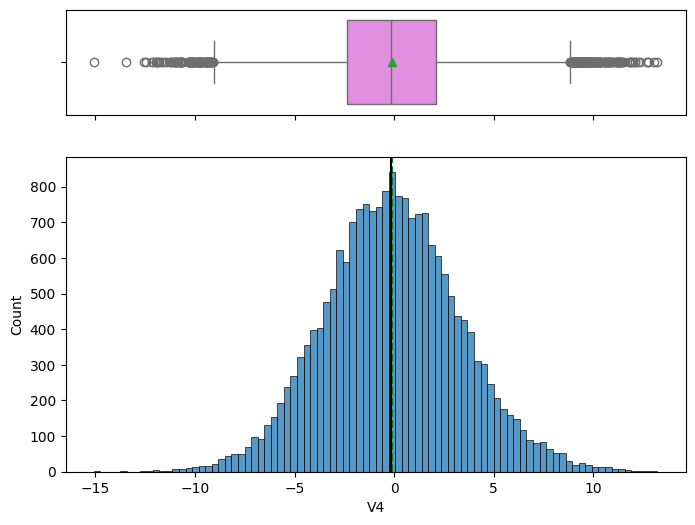

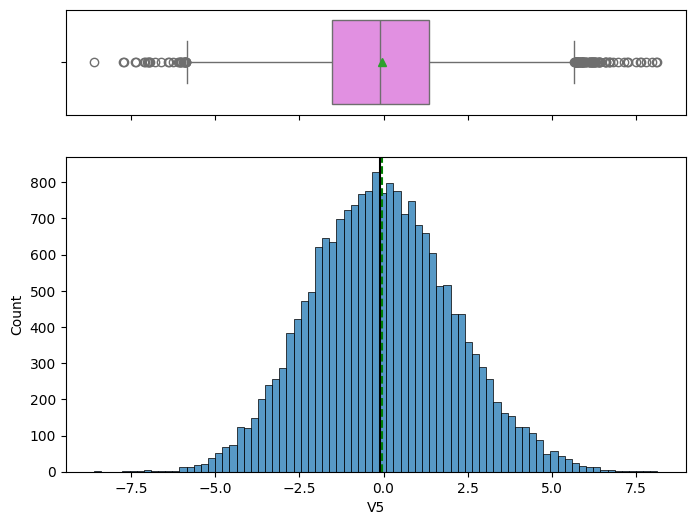

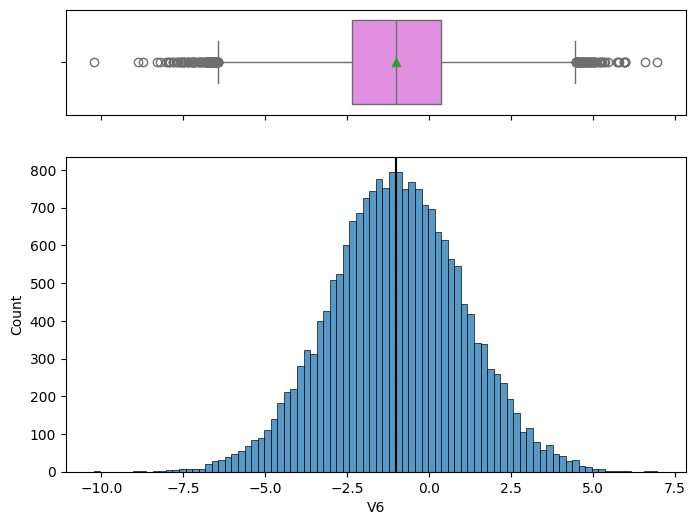

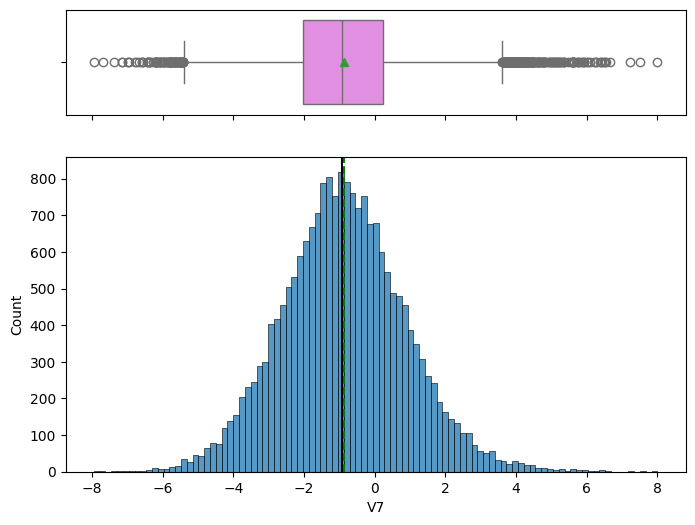

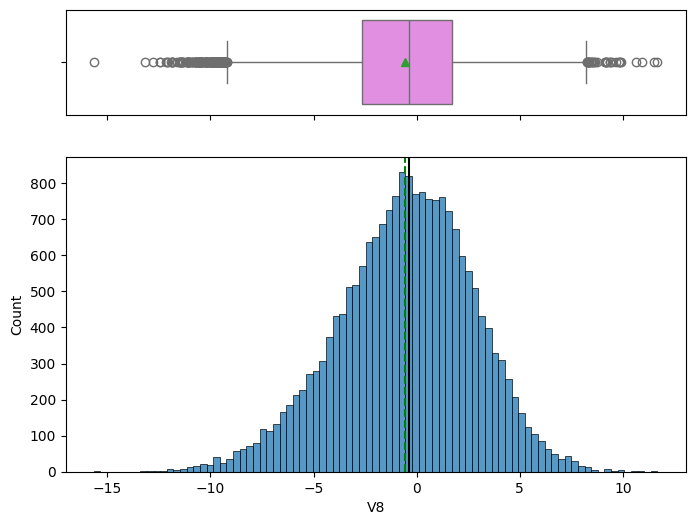

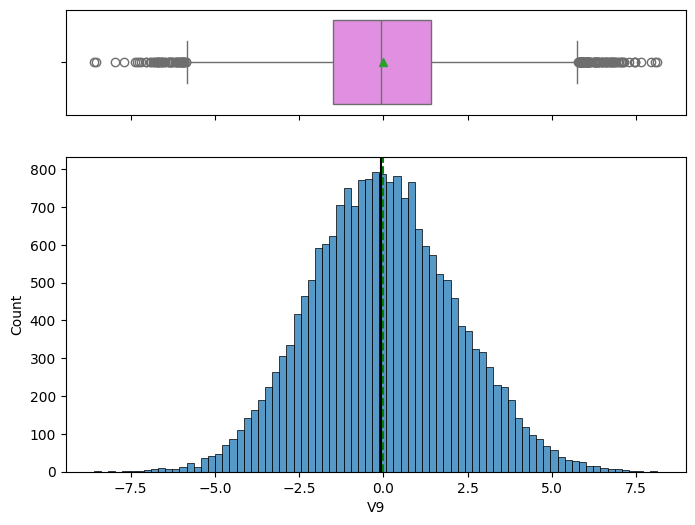

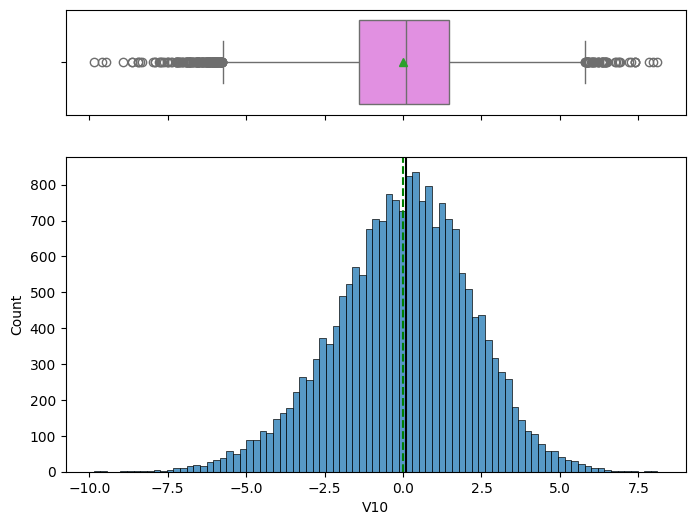

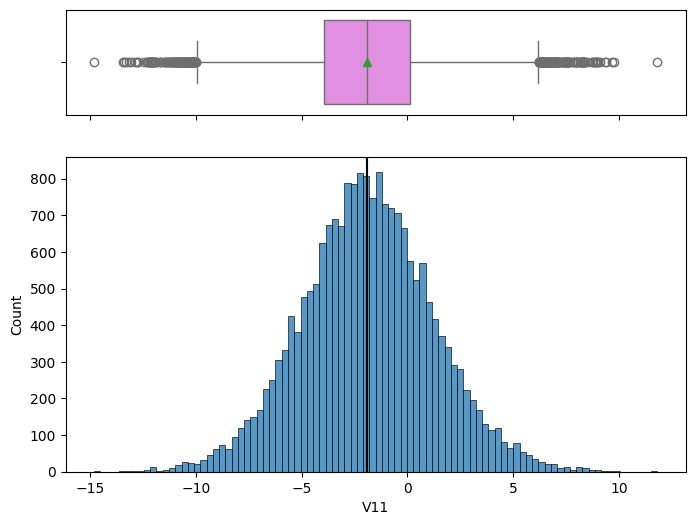

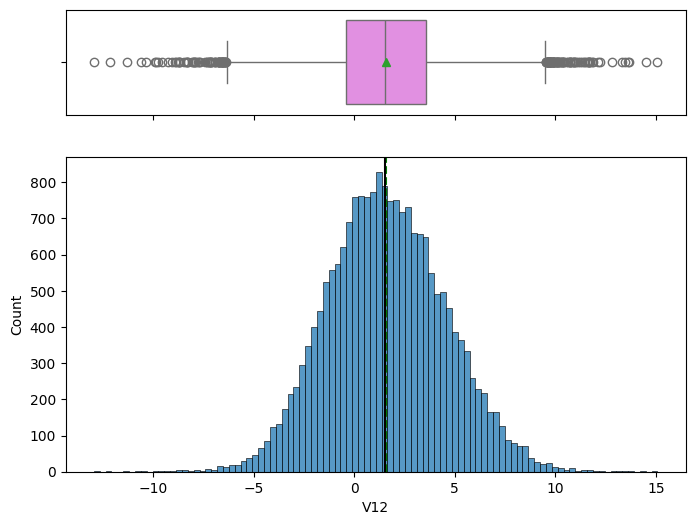

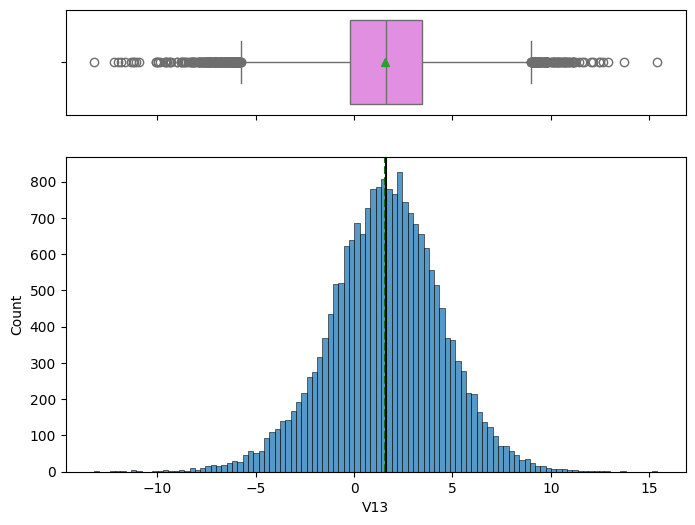

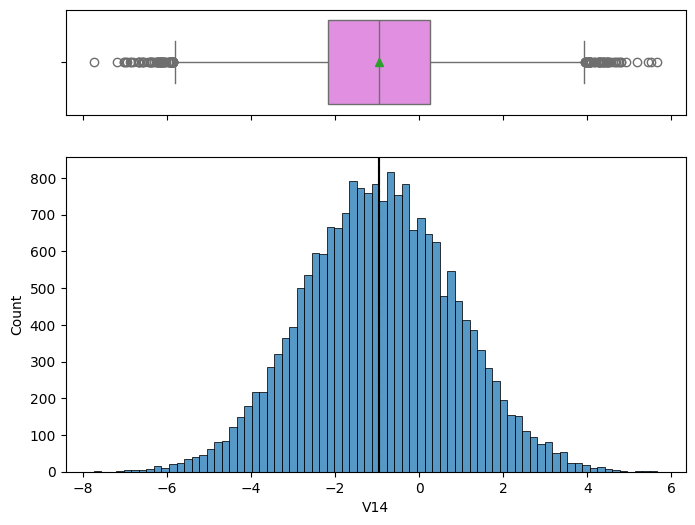

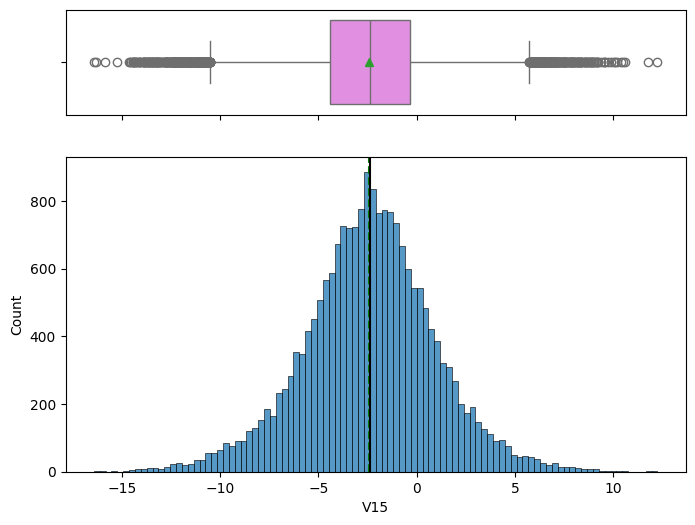

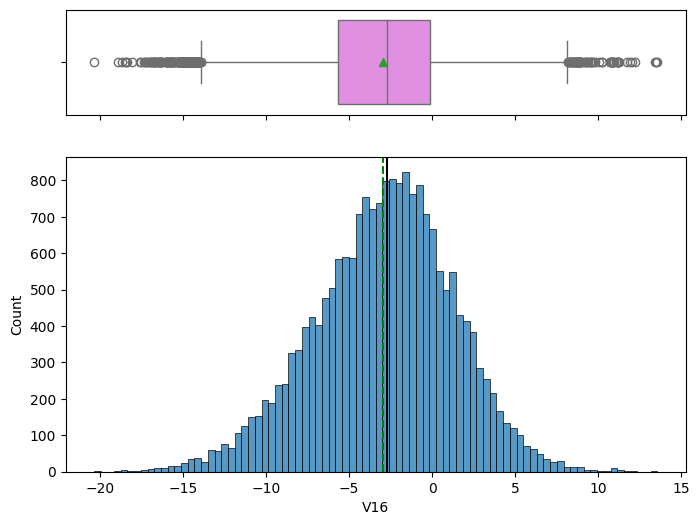

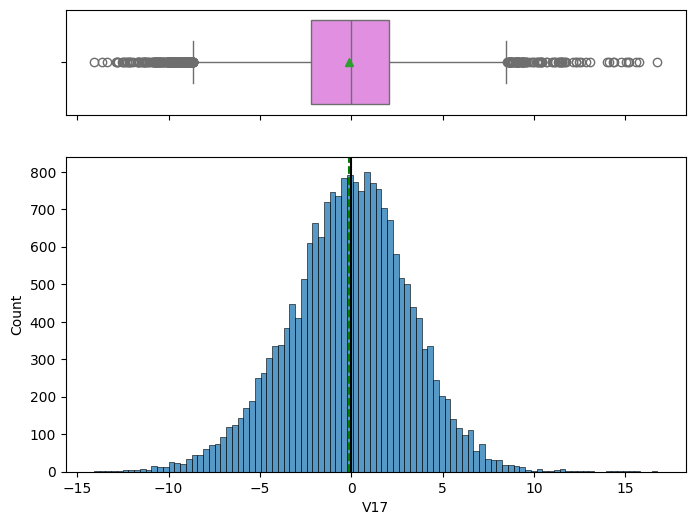

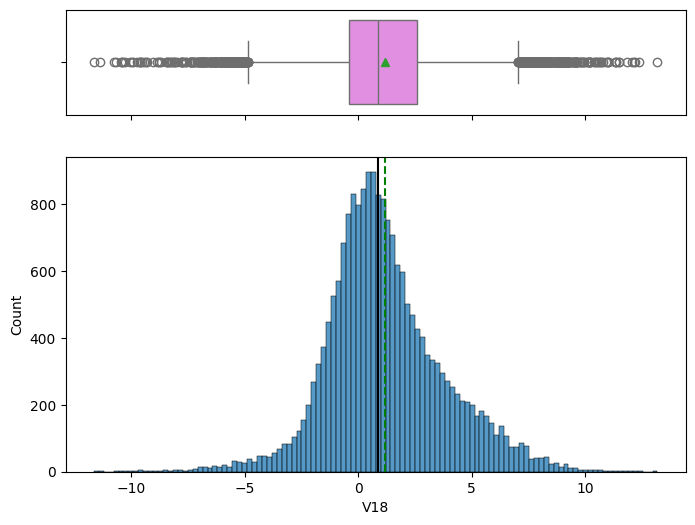

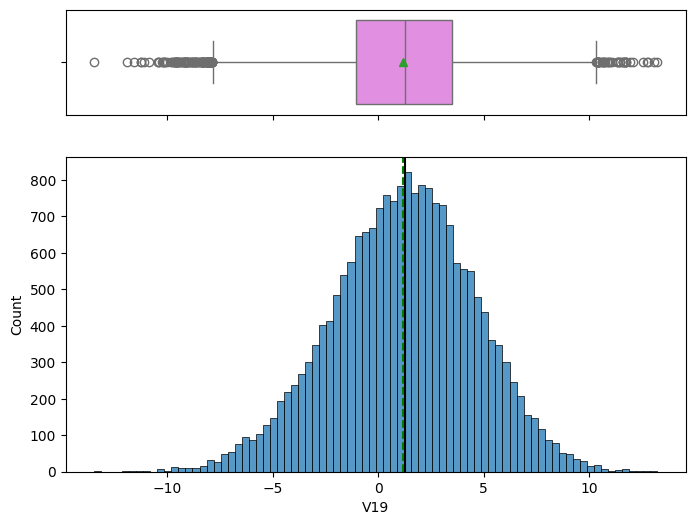

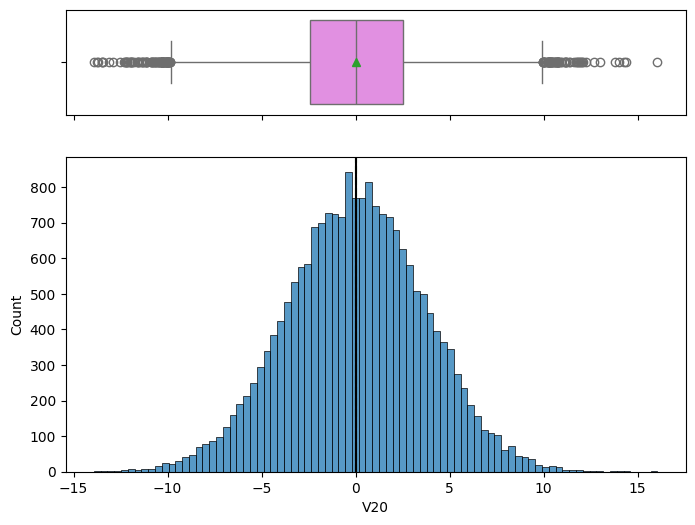

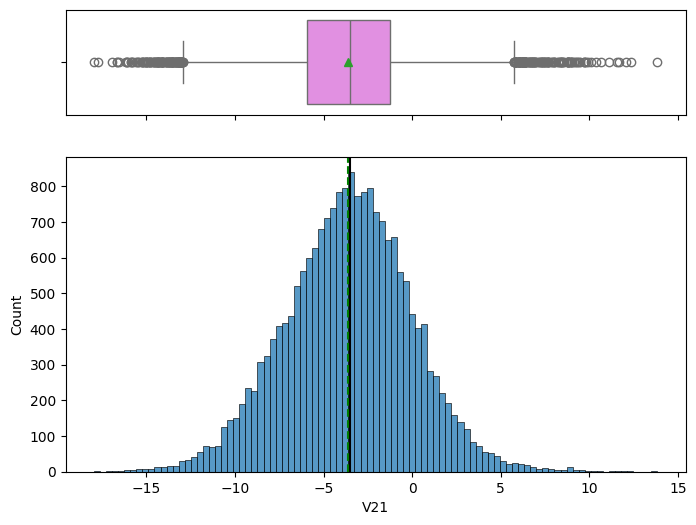

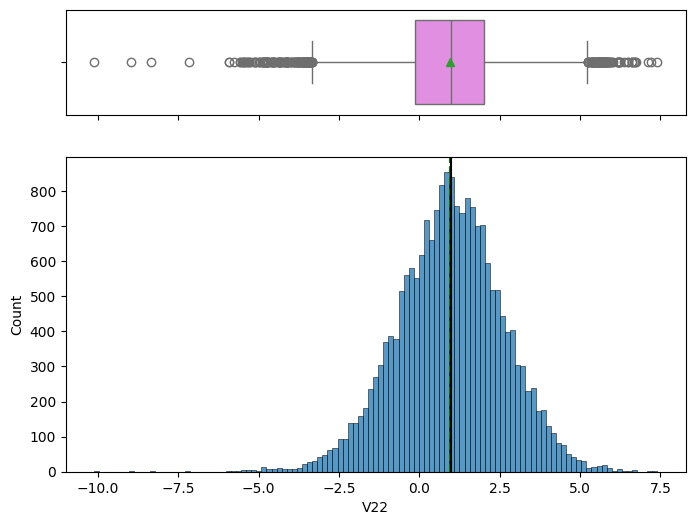

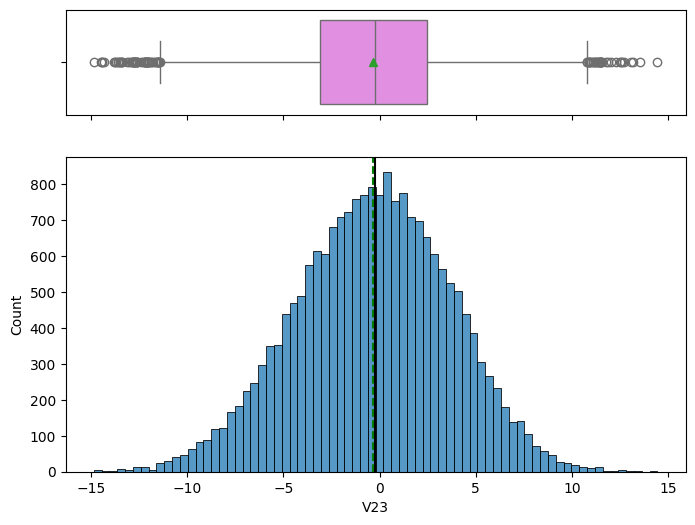

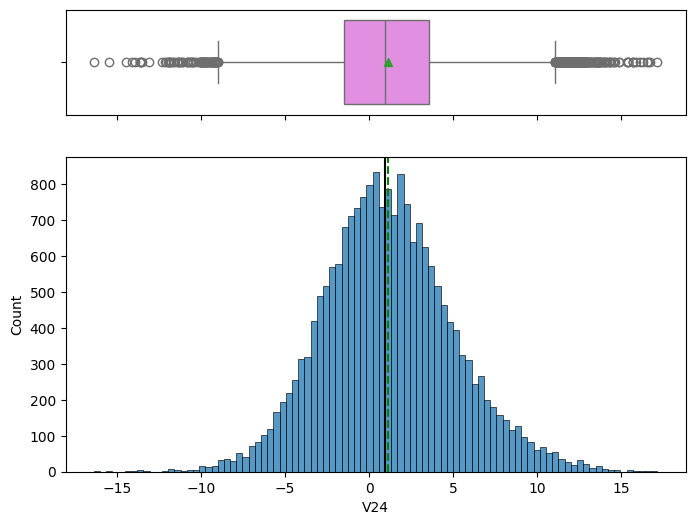

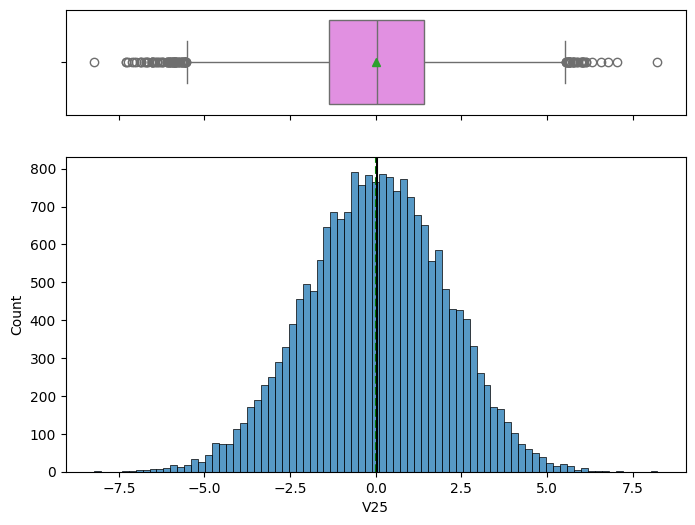

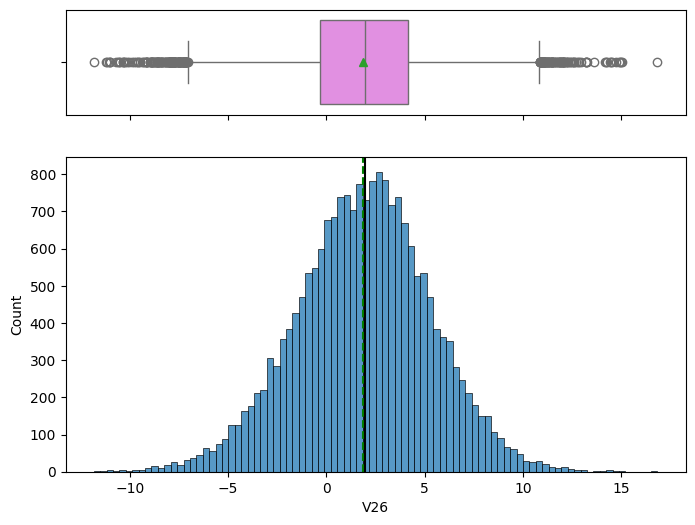

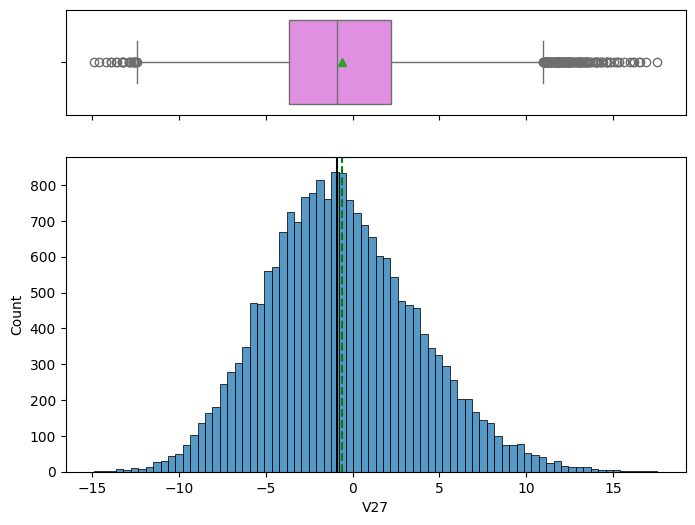

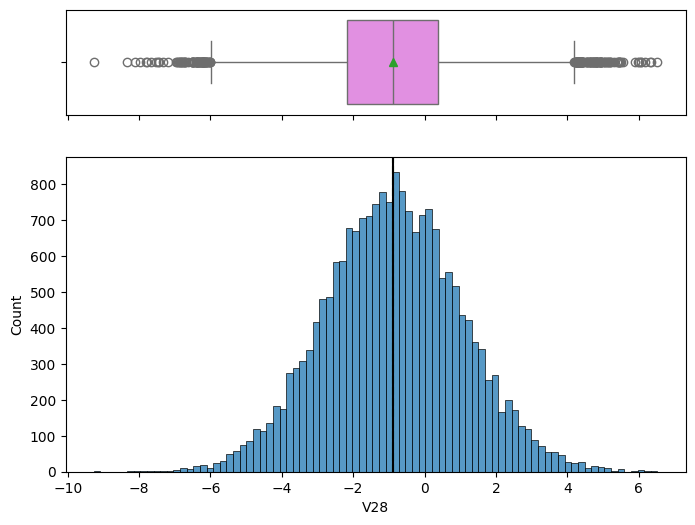

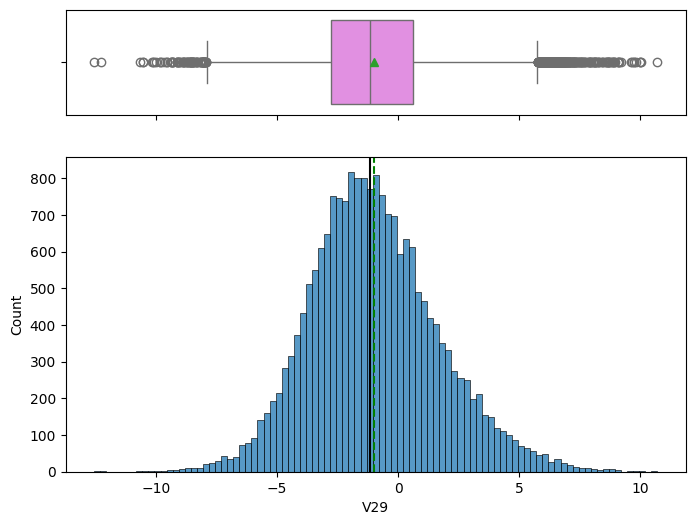

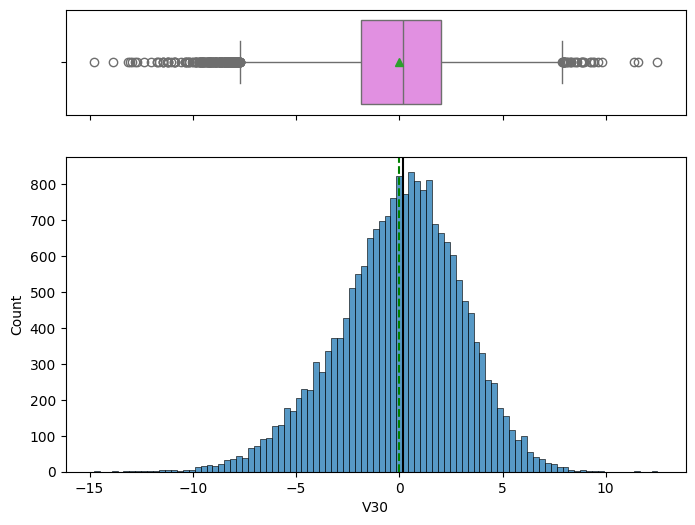

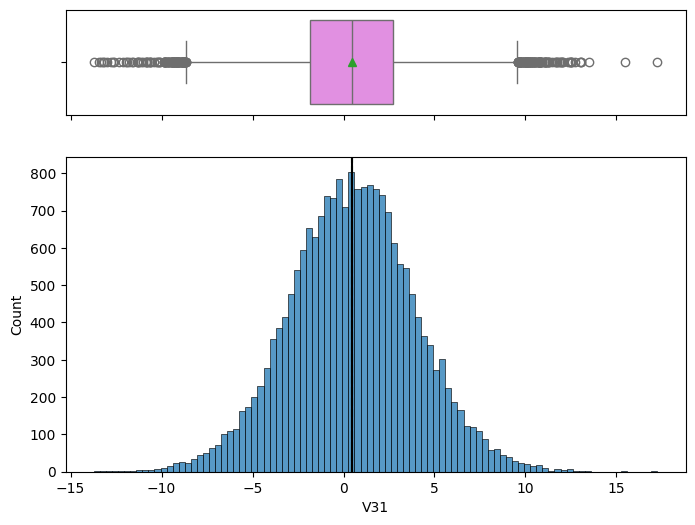

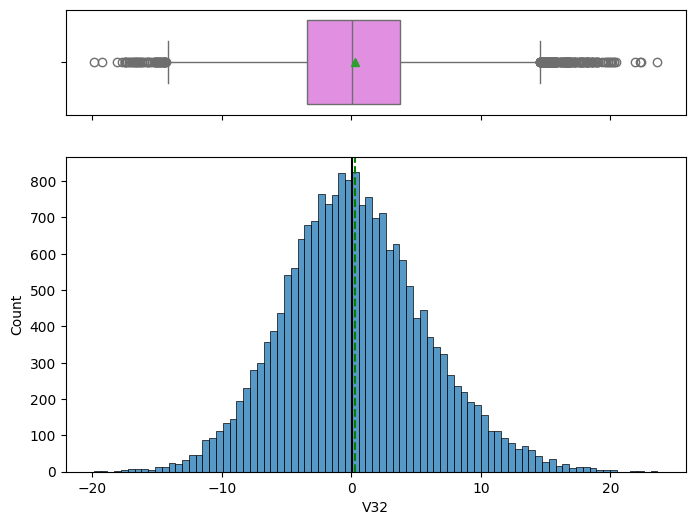

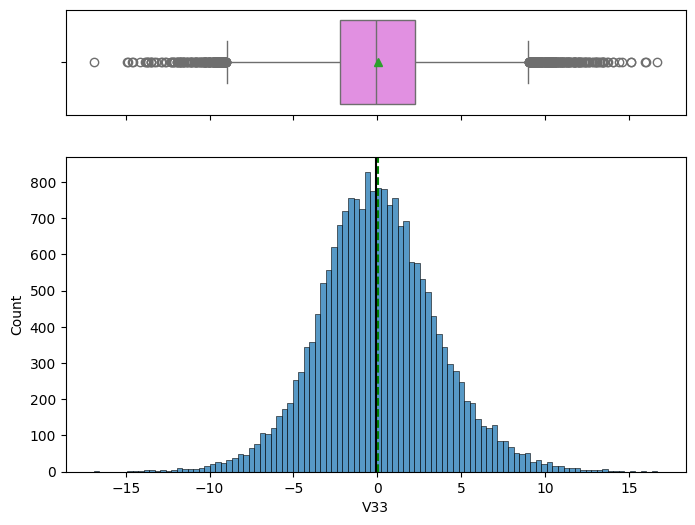

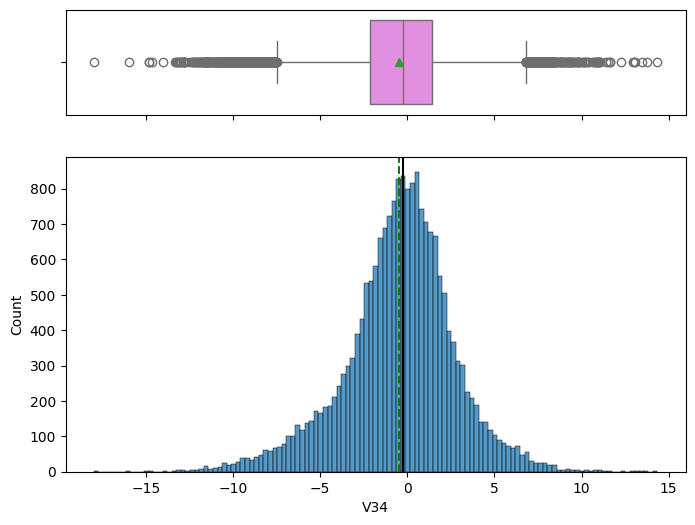

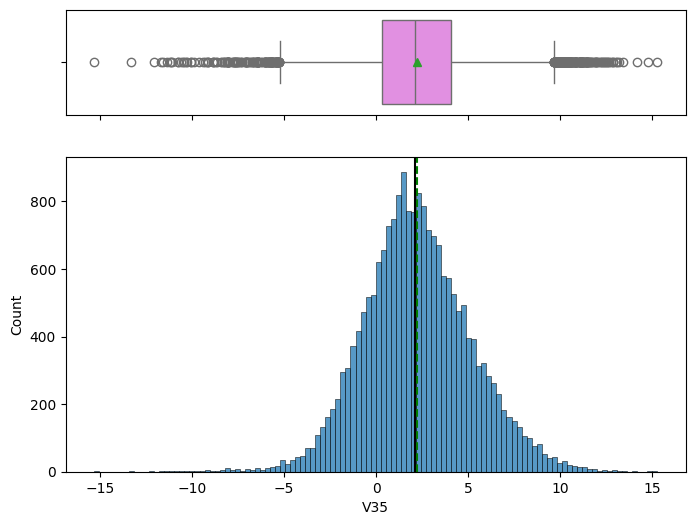

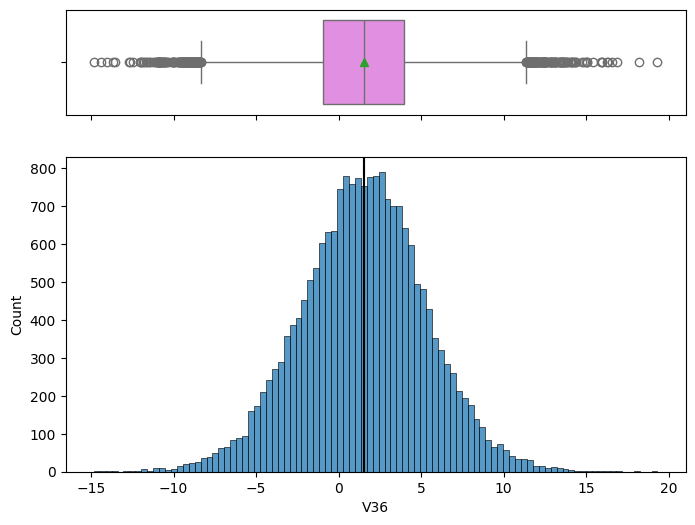

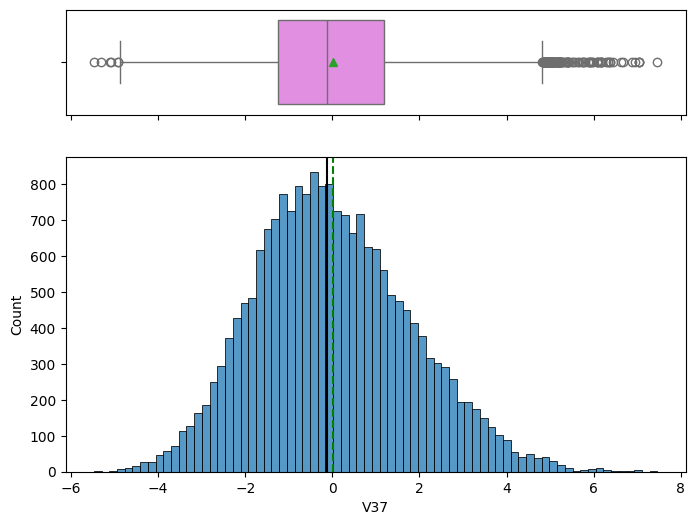

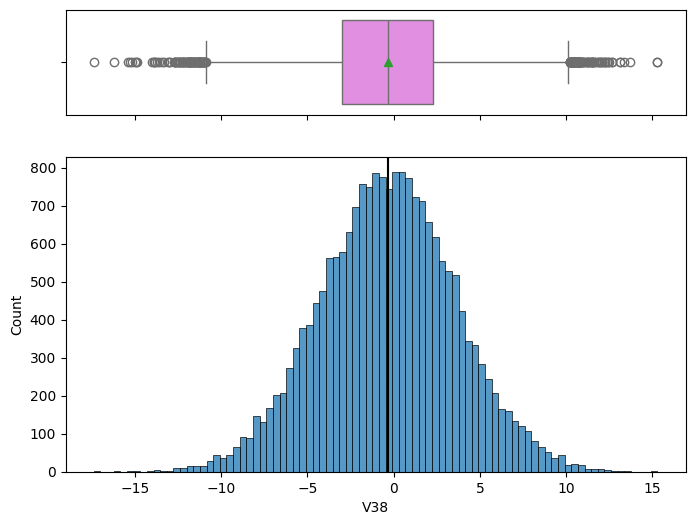

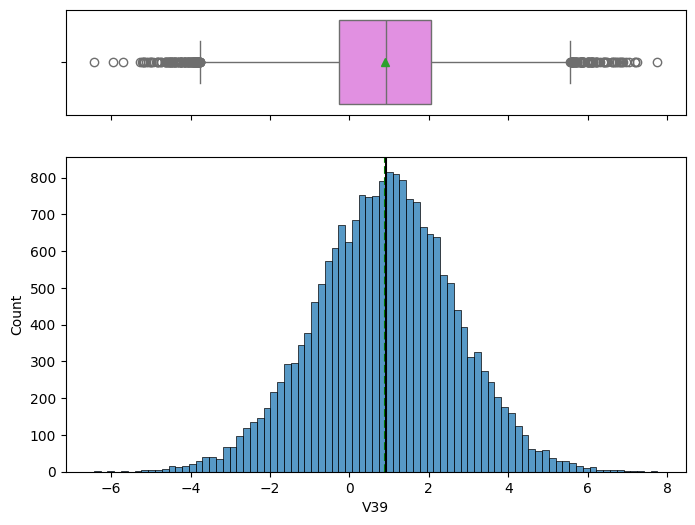

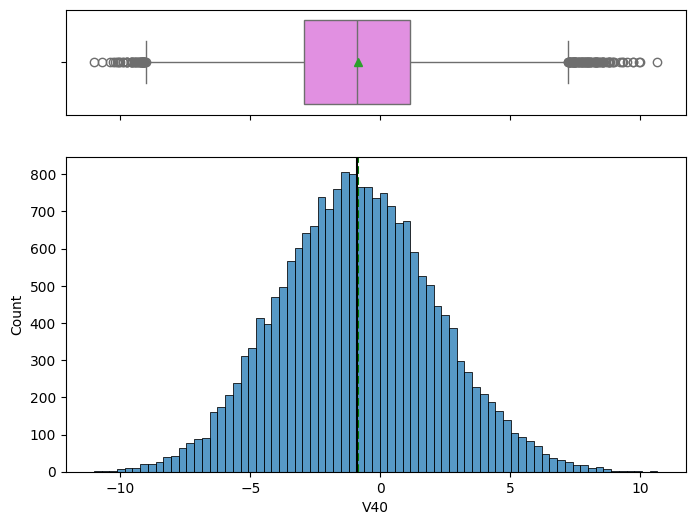

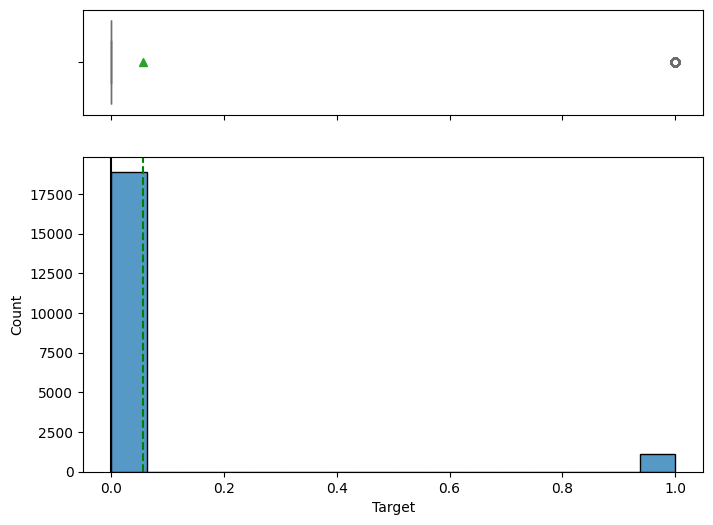

In [22]:
for feature in df.columns:
    histogram_boxplot(df, feature, figsize=(8, 6), kde=False, bins=None)

- Most of the features follow the normal distribution, except for V1, V18, and V37 whose distribution is slightly right-skewed, and except for V30 whose distribution is slightly left-skewed.
- The target data is dominated by value 0 which is no failure.

### Test data

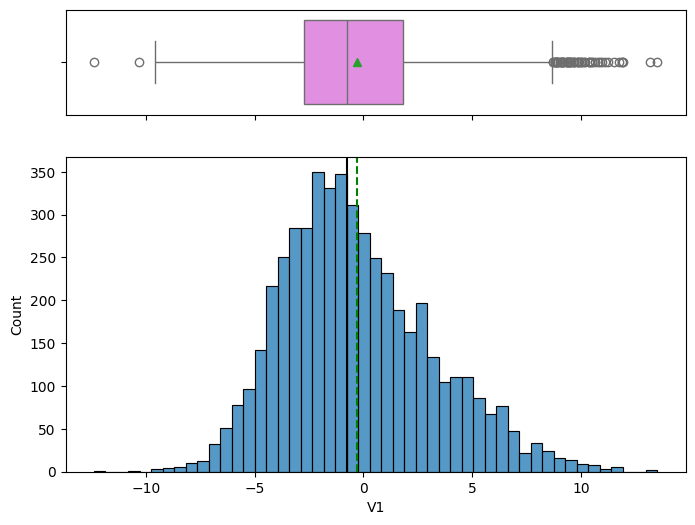

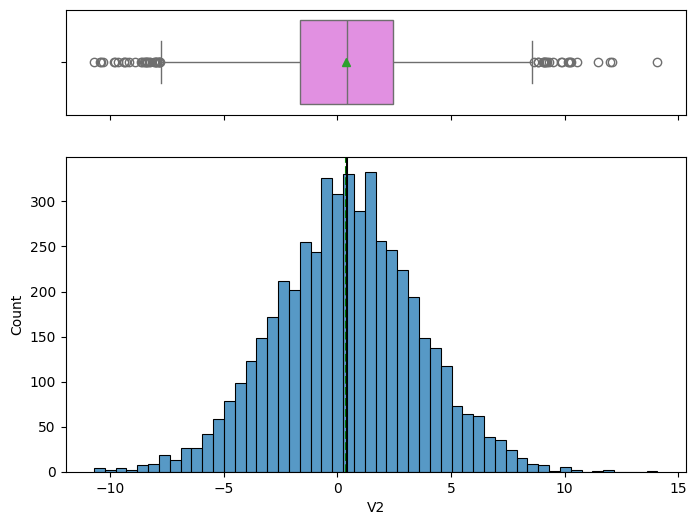

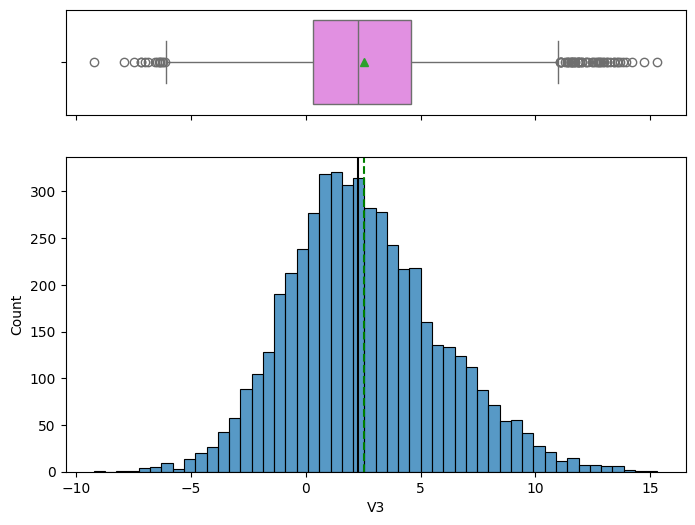

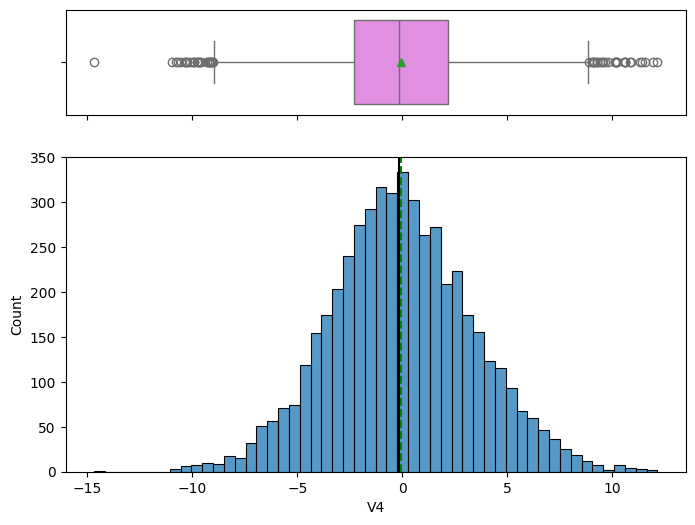

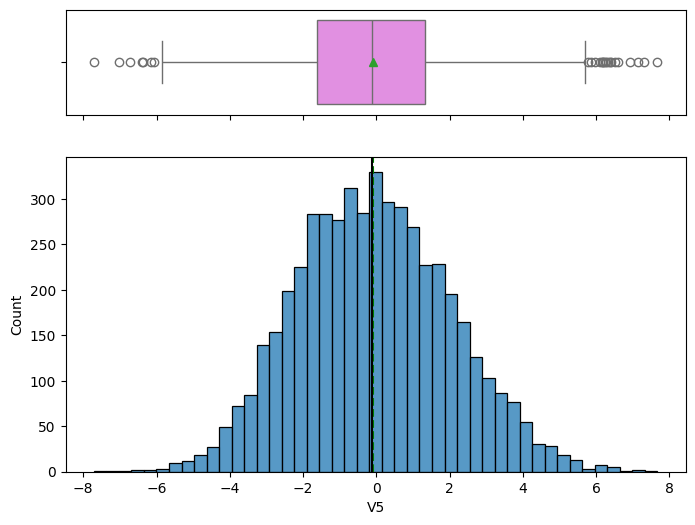

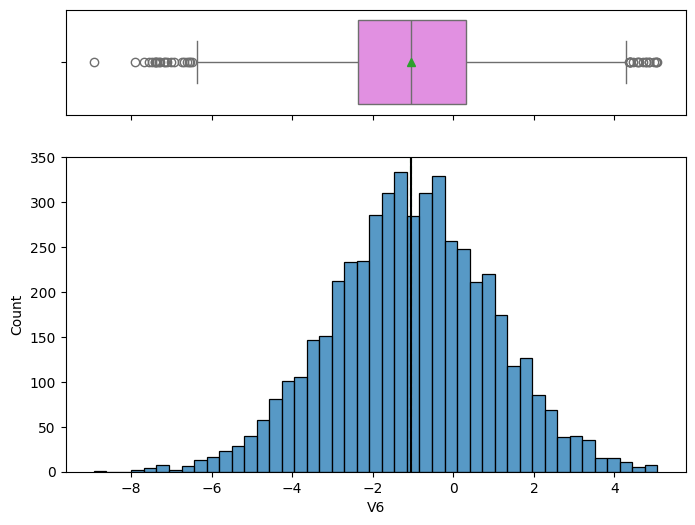

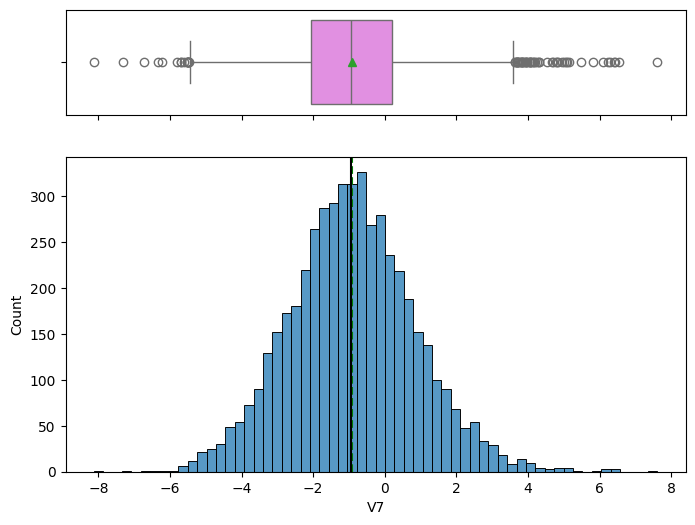

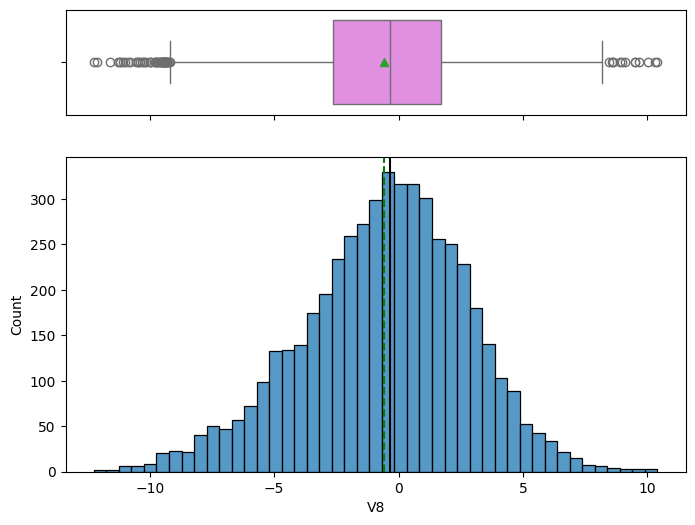

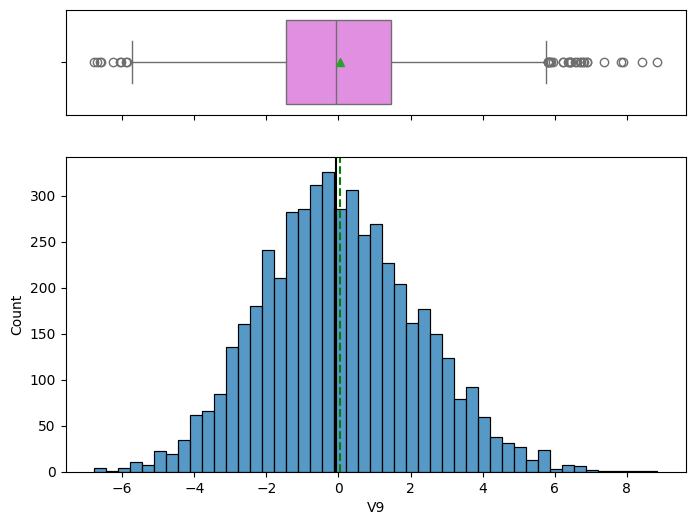

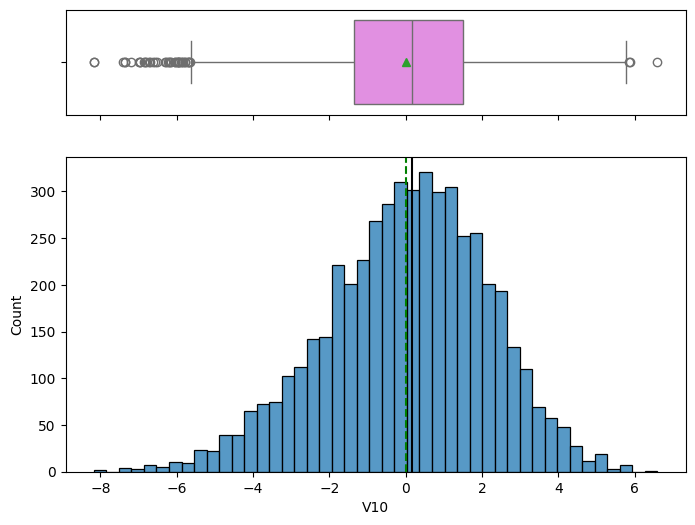

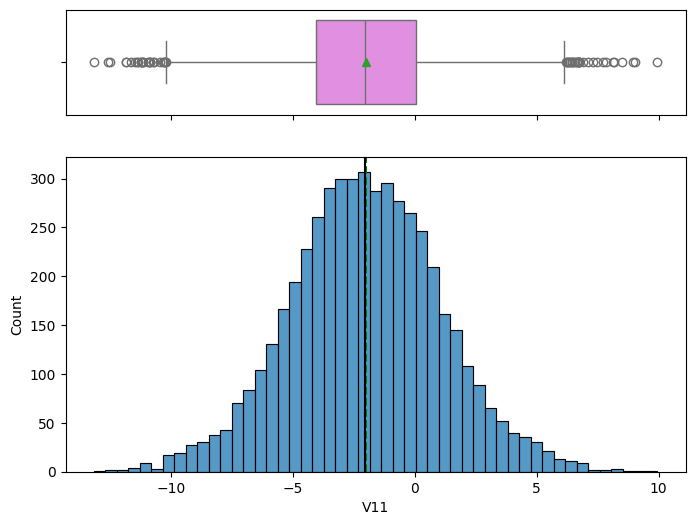

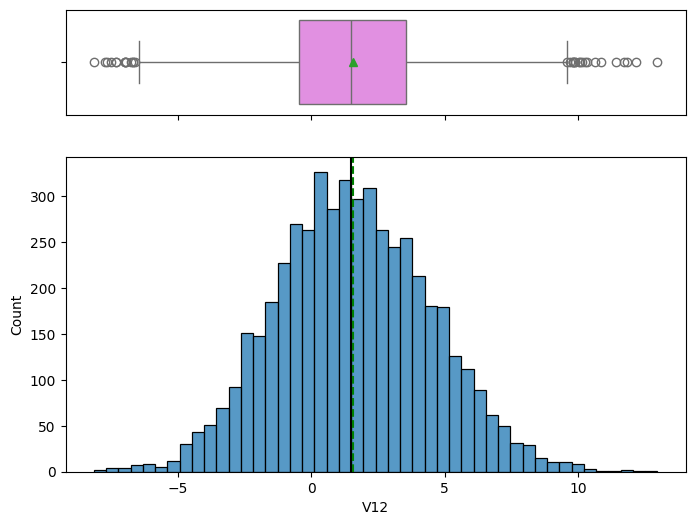

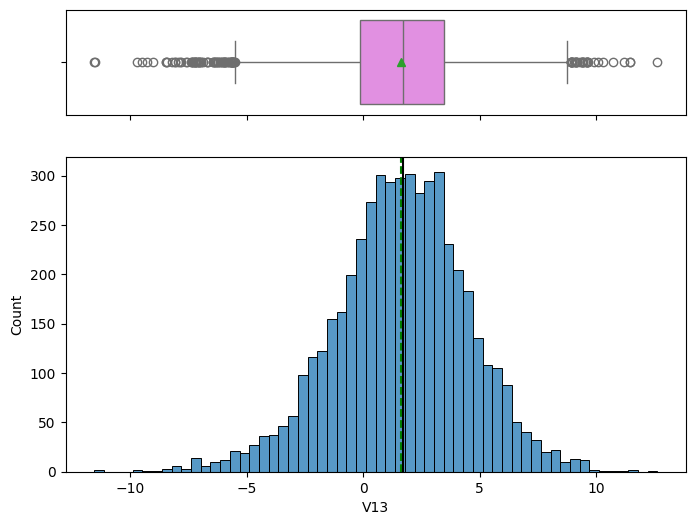

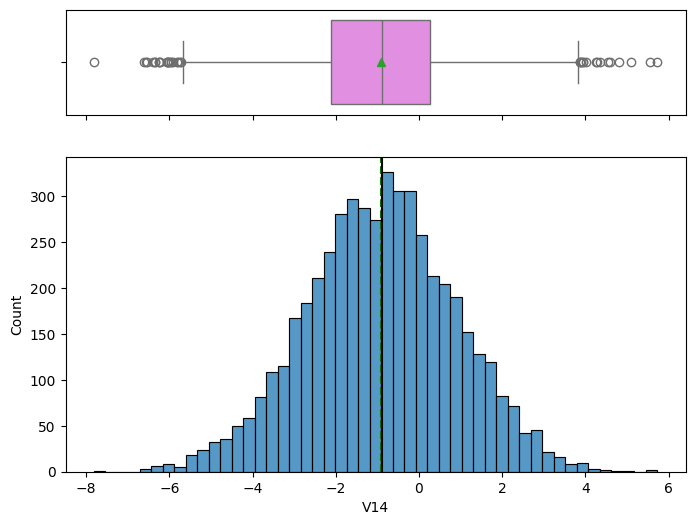

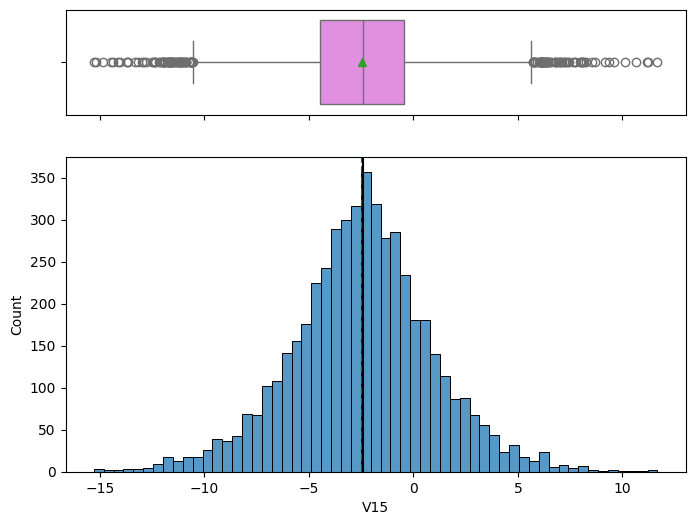

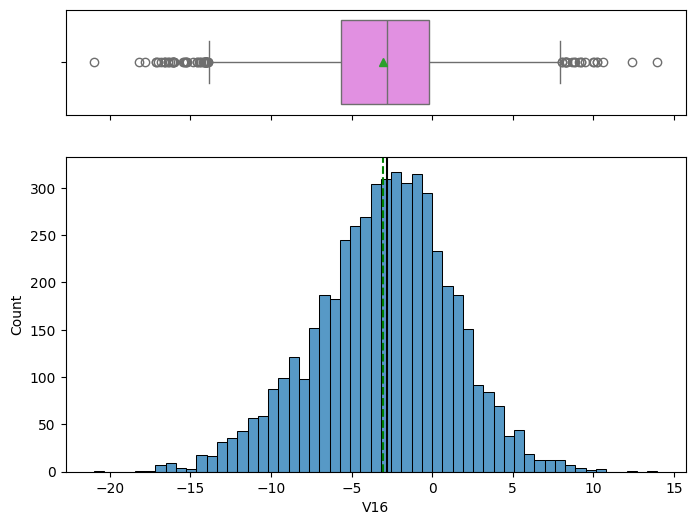

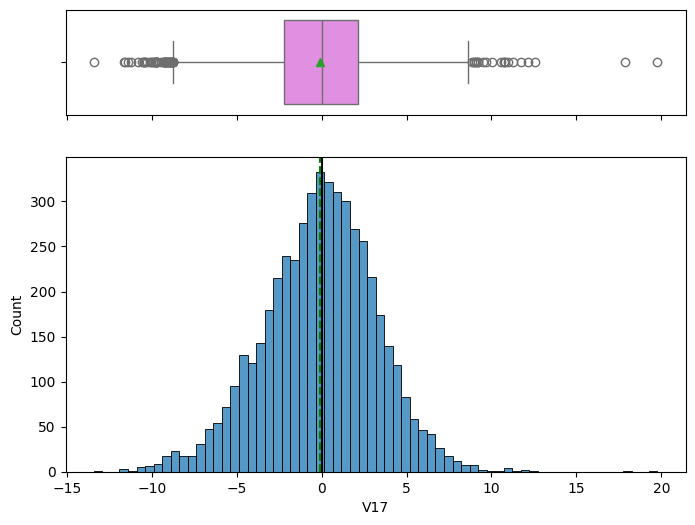

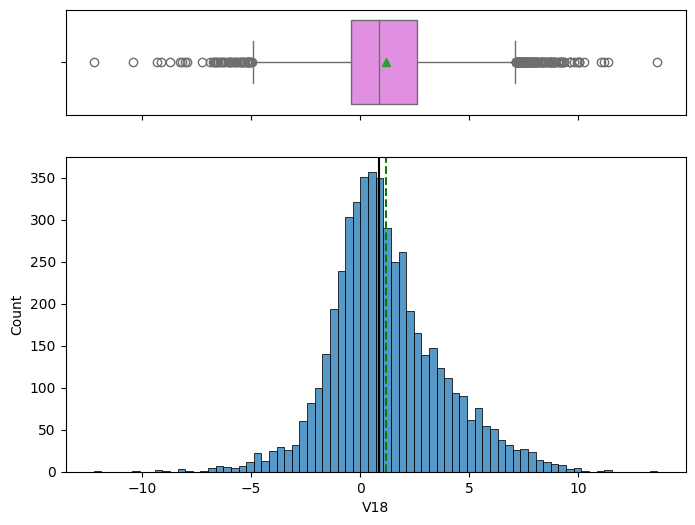

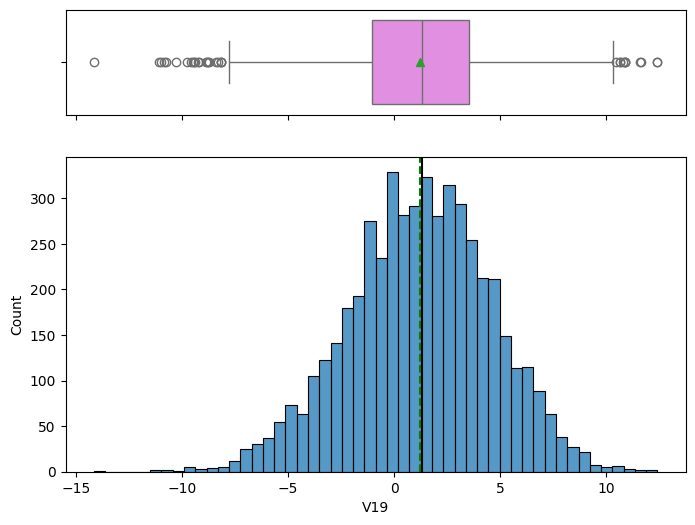

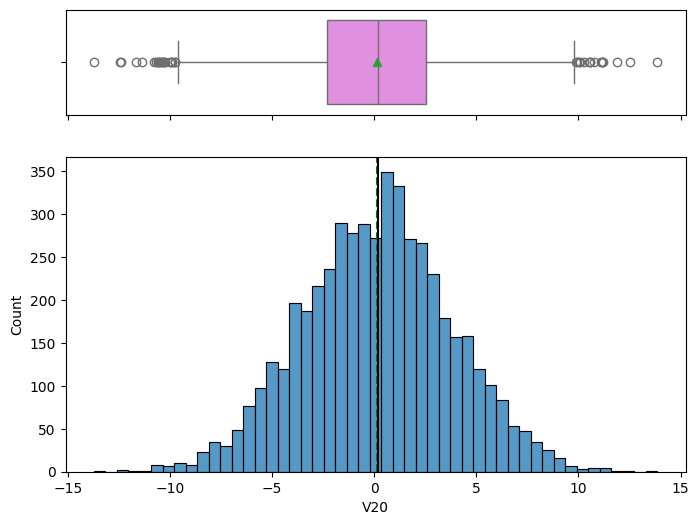

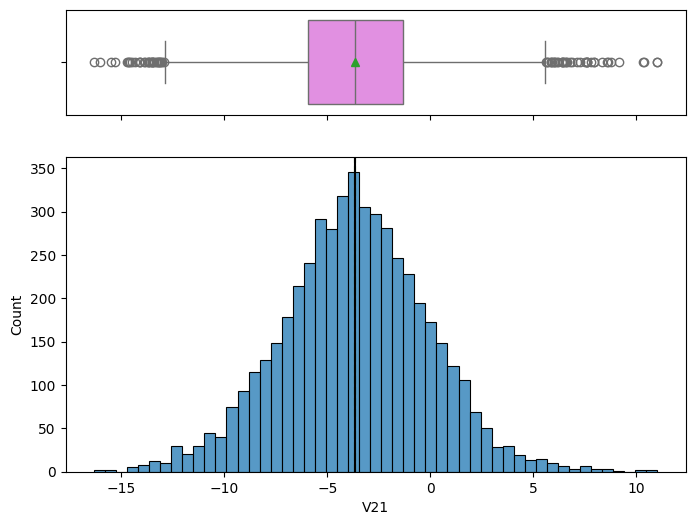

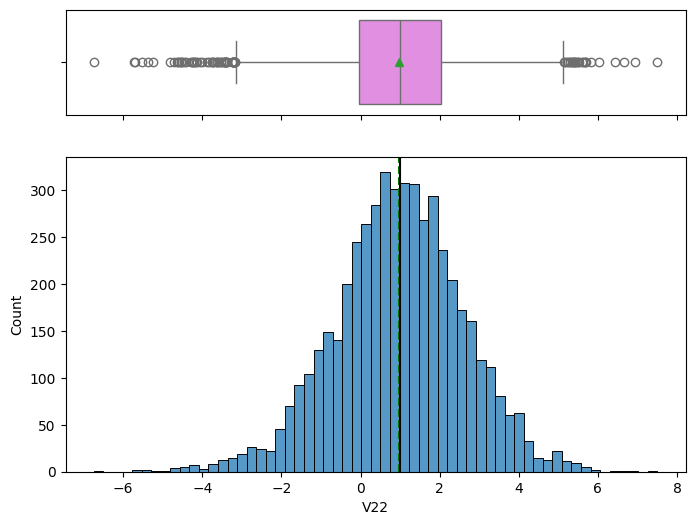

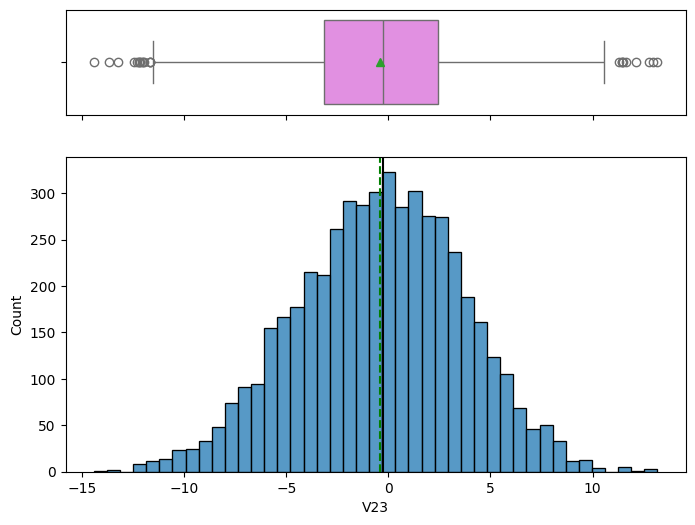

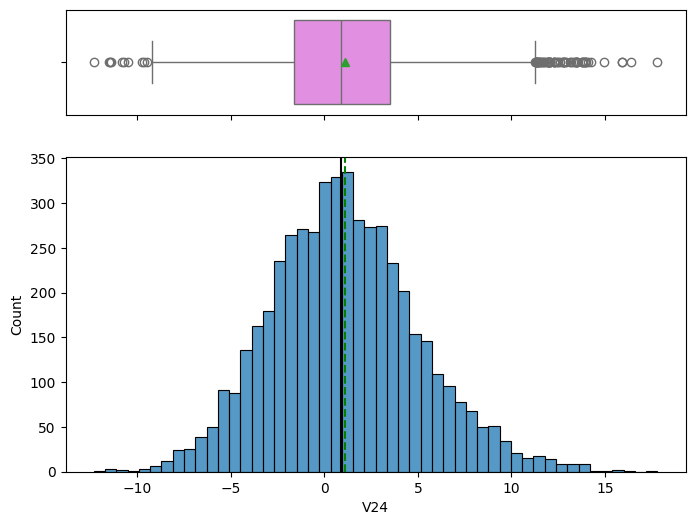

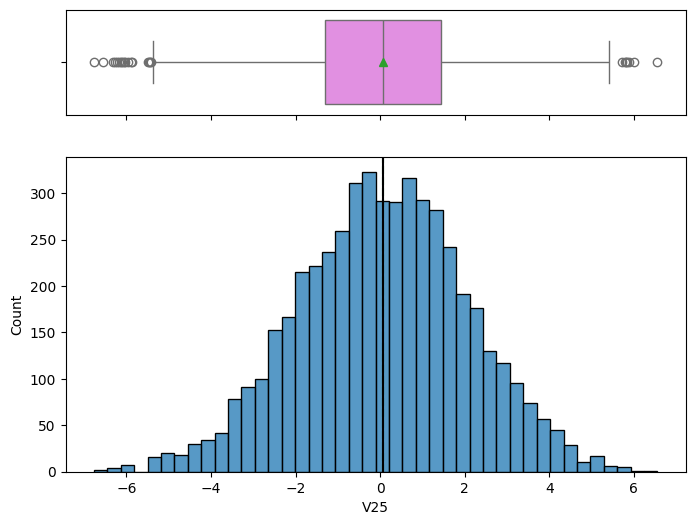

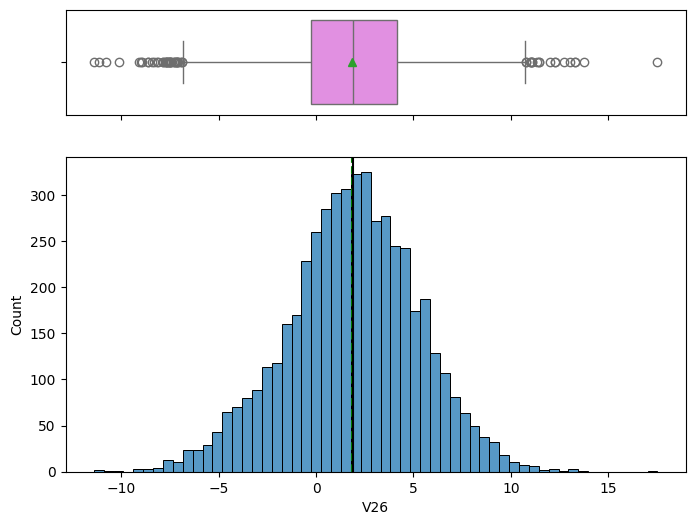

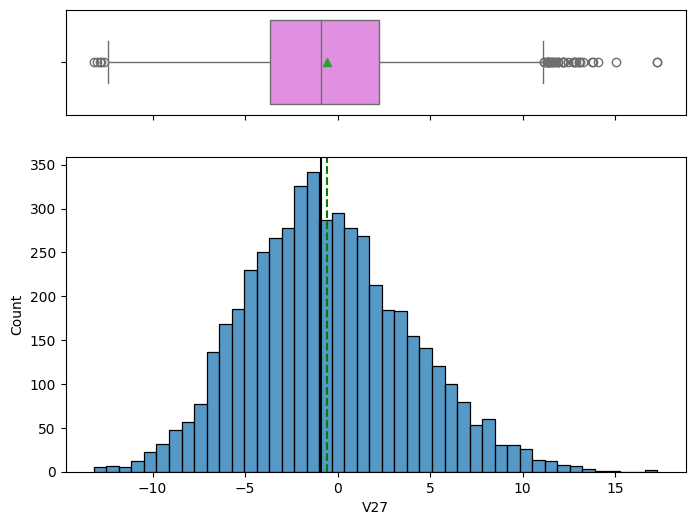

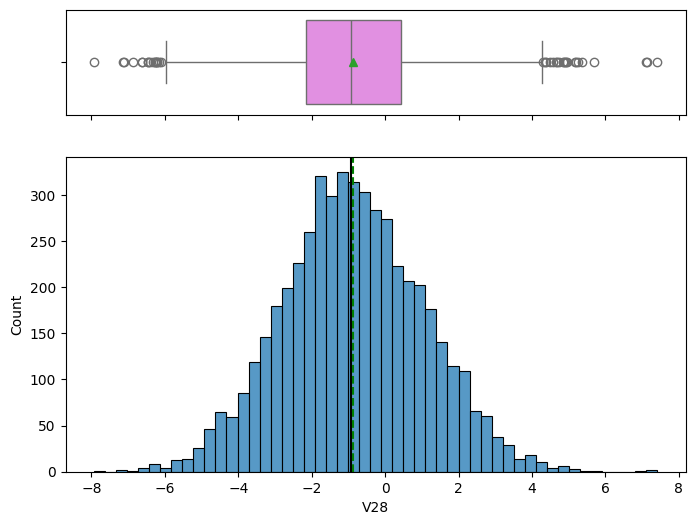

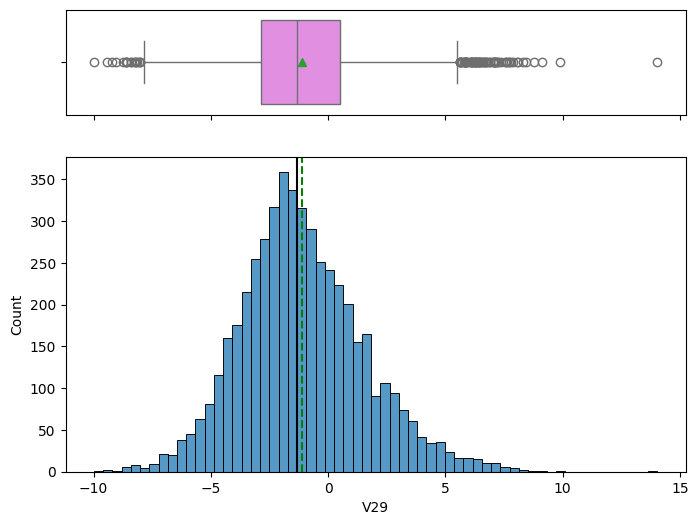

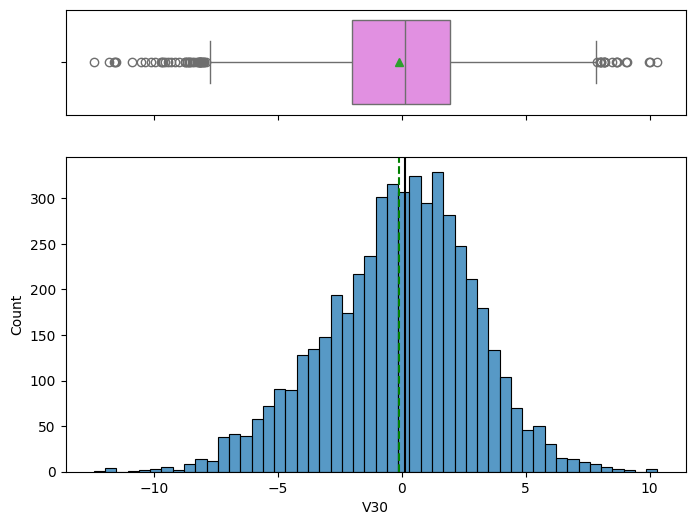

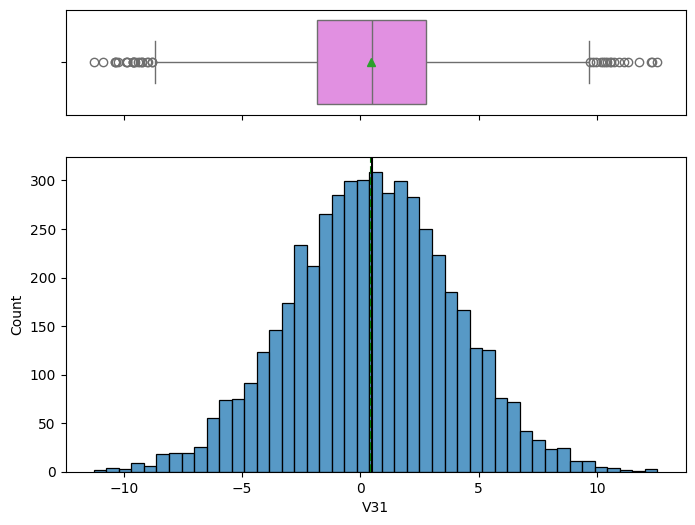

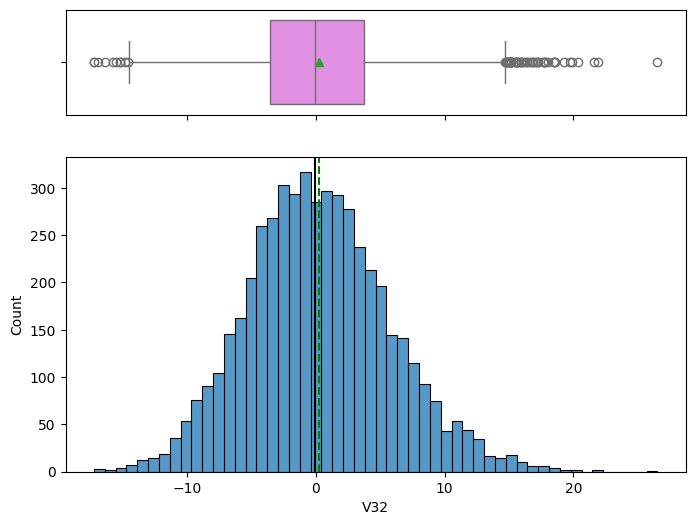

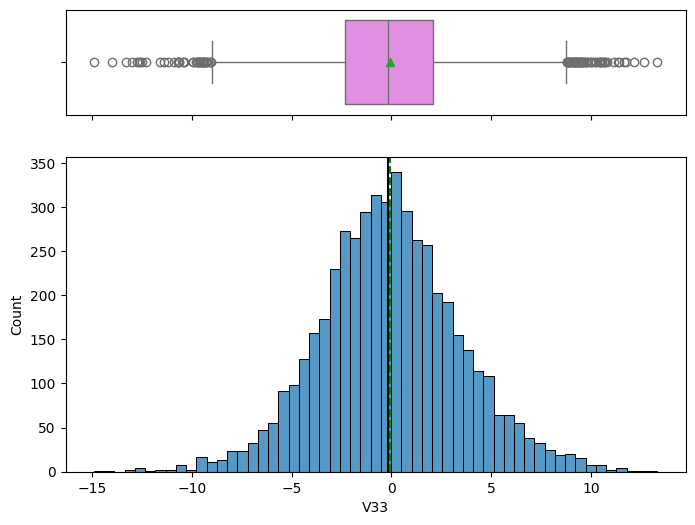

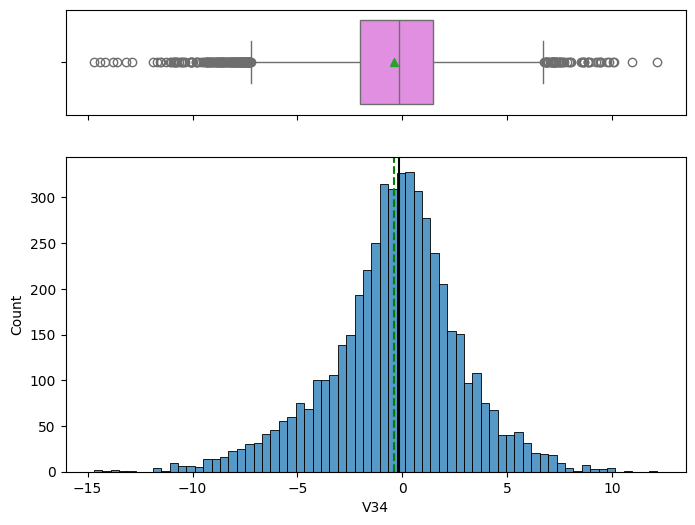

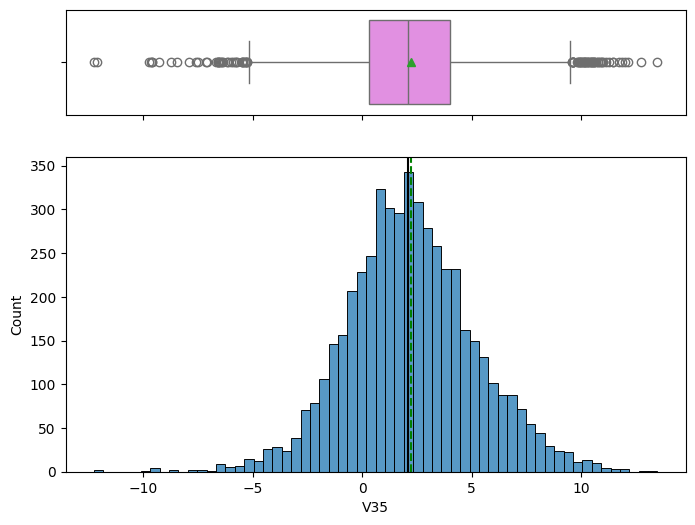

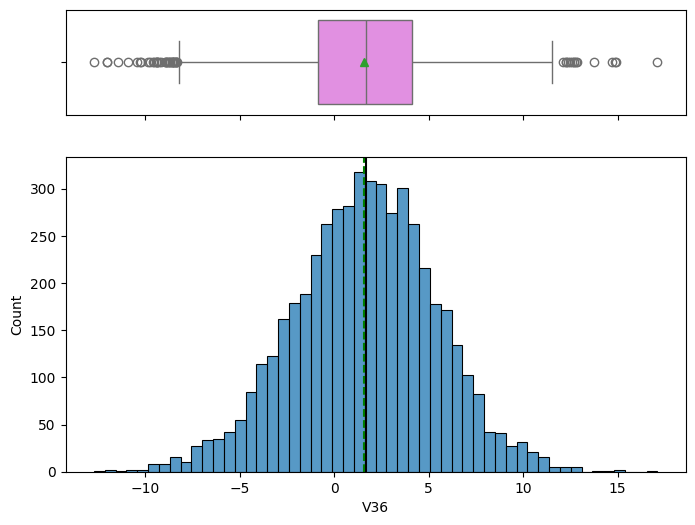

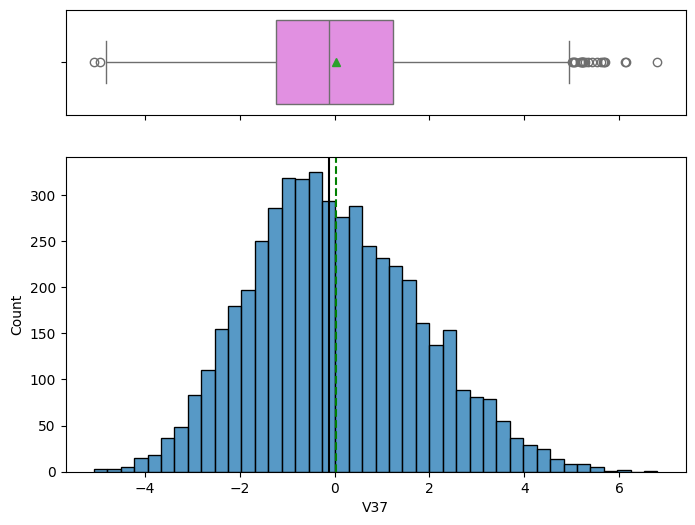

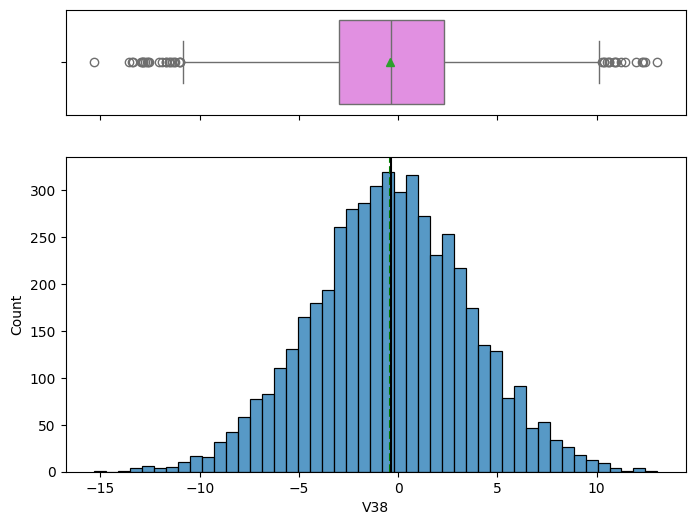

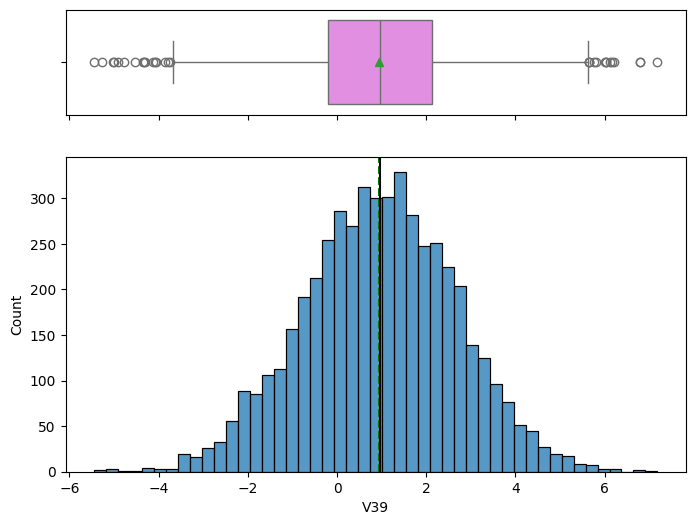

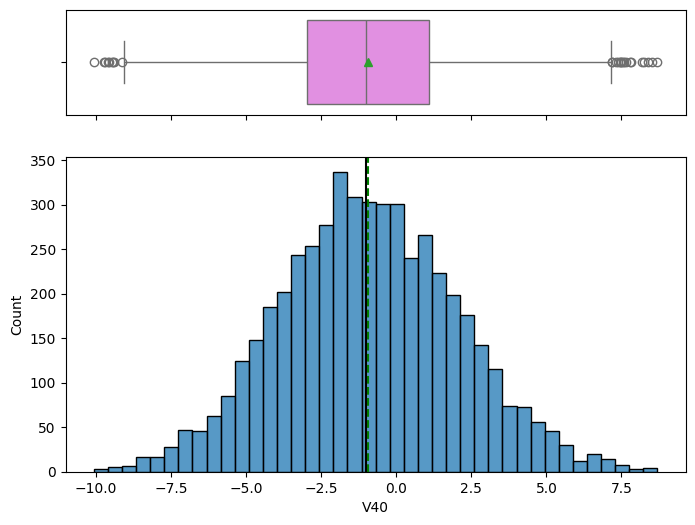

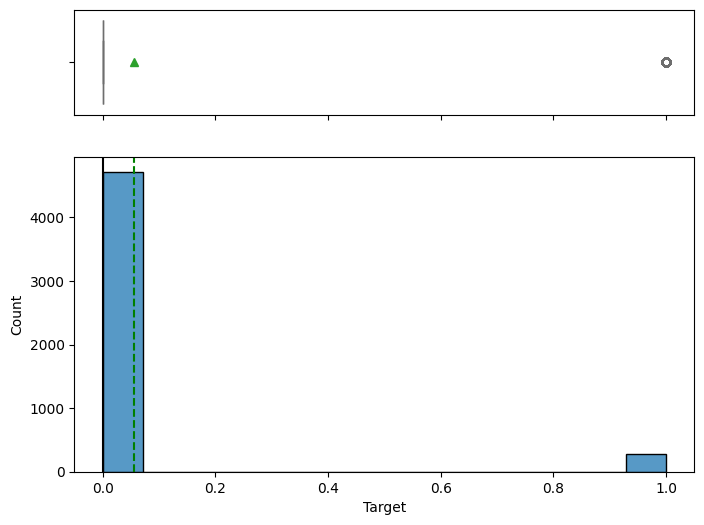

In [23]:
for feature in df.columns:
    histogram_boxplot(df_test, feature, figsize=(8, 6), kde=False, bins=None)

- In general, the distributions for each vairable in the test dataset are comparable to the distributions in the training dataset. For example, most of the variables follow the normal distribution. The distributions of V1, V18, and V37 are slightly right-skewed, and the distribution of V30 is slightly left-skewed.
- The target variable is also dominated by value 0 in the test dataset.

## Data Pre-processing

In [24]:
df1 = df.copy()
df_test1 = df_test.copy()

In [25]:
X = df1.drop('Target', axis=1)
y = df1['Target']

X_test = df_test1.drop('Target', axis=1)
y_test = df_test1['Target']

In [26]:
# Split training dataset into training and validation data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print(X_train.shape, X_val.shape, X_test.shape)

(14000, 40) (6000, 40) (5000, 40)


- There are 14000 training data samples, 6000 validation data samples, and 5000 test data samples.

## Missing value imputation




In [27]:
# Impute missing value in the data using median values
imputer = SimpleImputer(strategy='median')

In [28]:
# Fit and transform the training data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

In [29]:
# Transform the validation data and test data
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_val.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

In [30]:
# Check the missing value in the data again
print('Missing value number in training data')
print(X_train.isnull().sum())
print('*'*30)
print('Missing value number in validation data')
print(X_val.isnull().sum())
print('*'*30)
print('Missing value number in test data')
print(X_test.isnull().sum())
print('*'*30)

Missing value number in training data
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
******************************
Missing value number in validation data
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
******************************
Missing value number in test data
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0

- Now the missing values in the training, validation, and test datasets are imputed.

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [31]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [32]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [33]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

### Model Building with original data

Sample Decision Tree model building with original data

In [34]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("logistic", LogisticRegression(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1, eval_metric="logloss")))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

logistic: 0.4902481389578163
dtree: 0.7078246484698097
Random forest: 0.7194127377998345
Bagging: 0.707808105872622
Adaboost: 0.6434656741108354
GBM: 0.7220016542597187
XGBoost: 0.8095368072787427

Validation Performance:

logistic: 0.5015015015015015
dtree: 0.7057057057057057
Random forest: 0.7357357357357357
Bagging: 0.7267267267267268
Adaboost: 0.6516516516516516
GBM: 0.7357357357357357
XGBoost: 0.8288288288288288


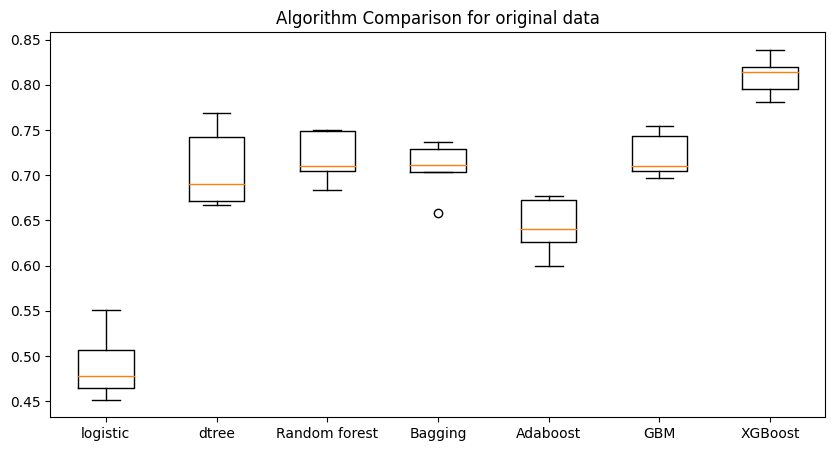

In [35]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,1,1)
ax1.boxplot(results1)
ax1.set_xticklabels(names)
ax1.set_title('Algorithm Comparison for original data')
plt.show()

- All the models are generalized on both training and validation datasets, which have comparable recall values in both datasets.
- XGBoost model has the highest recall values among all the models (0.81 and 0.83 for training and validation), followed by the GBM model (0.72 and 0.74 for training and validation) and random forest model (0.72 and 0.74 for training and validataion).
- Logistic regression model has the lowest recall value.
- But even for XGBoost model, recall values are only around 0.8 in both training and validation data, which are not very high. We will try oversampling and undersampling to see if we can improve the model.

### Model Building with Oversampled data


In [36]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [37]:
print('Before oversampling, the number of data points in Target 1 is {}'.format(sum(y_train == 1)))
print('Before oversampling, the number of data points in Target 0 is {}'.format(sum(y_train == 0)))
print('After oversampling, the number of data points in Target 1 is {}'.format(sum(y_train_over == 1)))
print('After oversampling, the number of data points in Target 0 is {}'.format(sum(y_train_over == 0)))

Before oversampling, the number of data points in Target 1 is 777
Before oversampling, the number of data points in Target 0 is 13223
After oversampling, the number of data points in Target 1 is 13223
After oversampling, the number of data points in Target 0 is 13223


In [38]:
results1_over = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )
    results1_over.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

logistic: 0.8917044404851445
dtree: 0.970128321355339
Random forest: 0.9829090368319754
Bagging: 0.975119441528989
Adaboost: 0.904787470436327
GBM: 0.9329201902370526
XGBoost: 0.9904713314591799

Validation Performance:

logistic: 0.8498498498498499
dtree: 0.7837837837837838
Random forest: 0.8558558558558559
Bagging: 0.8258258258258259
Adaboost: 0.8618618618618619
GBM: 0.8768768768768769
XGBoost: 0.8558558558558559


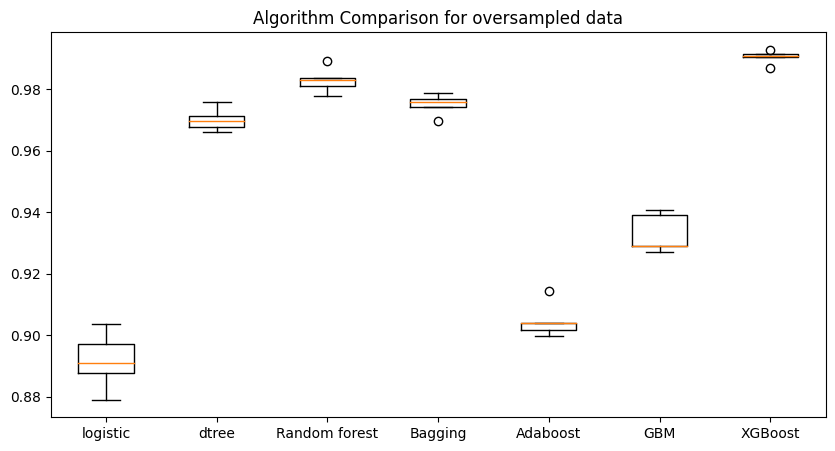

In [39]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,1,1)
ax1.boxplot(results1_over)
ax1.set_xticklabels(names)
ax1.set_title('Algorithm Comparison for oversampled data')
plt.show()

- All the models tend to overfit which show higher recall values in the training data than validataion data.
- Among all the models trained using oversampled data, Adaboost model and logistic regression model are more generalized models than others. Adaboost model has the recall values of 0.90 and 0.86 for training and validation data, respectively. Logistic regression model has the recall values of 0.89 and 0.84 for training and validation datasets, respectively.

### Model Building with Undersampled data

In [40]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [41]:
print('Before undersampling, the number of data points in Target 1 is {}'.format(sum(y_train == 1)))
print('Before undersampling, the number of data points in Target 0 is {}'.format(sum(y_train == 0)))
print('After undersampling, the number of data points in Target 1 is {}'.format(sum(y_train_un == 1)))
print('After undersampling, the number of data points in Target 0 is {}'.format(sum(y_train_un == 0)))

Before undersampling, the number of data points in Target 1 is 777
Before undersampling, the number of data points in Target 0 is 13223
After undersampling, the number of data points in Target 1 is 777
After undersampling, the number of data points in Target 0 is 777


In [42]:
results1_un = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold
    )
    results1_un.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

logistic: 0.8726220016542598
dtree: 0.8622167080231596
Random forest: 0.9034822167080232
Bagging: 0.880339123242349
Adaboost: 0.8725971877584782
GBM: 0.8932009925558313
XGBoost: 0.8983457402812242

Validation Performance:

logistic: 0.8468468468468469
dtree: 0.8408408408408409
Random forest: 0.8828828828828829
Bagging: 0.8708708708708709
Adaboost: 0.8588588588588588
GBM: 0.8828828828828829
XGBoost: 0.8828828828828829


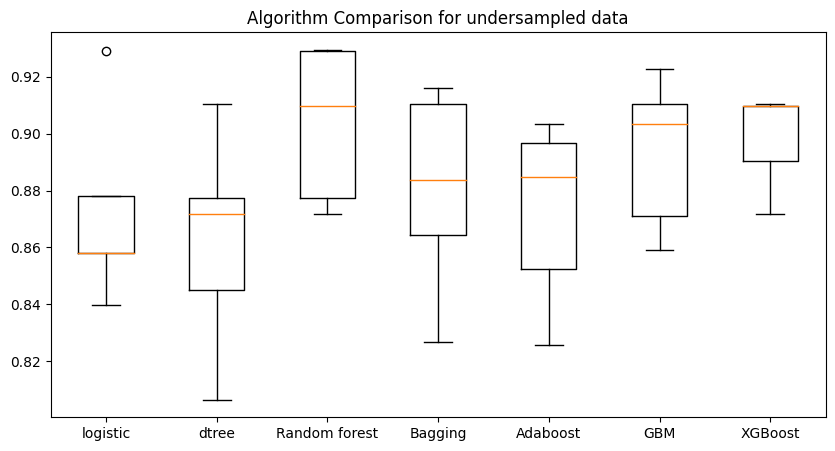

In [43]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,1,1)
ax1.boxplot(results1_un)
ax1.set_xticklabels(names)
ax1.set_title('Algorithm Comparison for undersampled data')
plt.show()

- The models built based on undersampled data are more generalized than the models built based on oversampled data.
- The highest recall values are given by random forest model, which has 0.90 and 0.88 for training and validation, respectively. XGBoost model and GBM model also perform relatively well.
- The recall values from cross validation in each model range wider for models built based on undersampled data than models built based on oversampled data.

## HyperparameterTuning

- Based on the model performance evaluated earlier, Adaboost model using oversampled data, logistic regression model with oversampled data, random forest model using undersampled data, XGBoost model using undersampled data, and GBM model using undersampled data are the top three models. The justification is that their recall values rank at the top and they also have relatively generalized performance on both training and validation datasets at the same time.

### Sample Parameter Grids

### Tuning for Adaboost model with oversampled data

In [44]:
# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {"n_estimators": [100, 150, 200],
              "learning_rate": [0.2, 0.05],
              "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1),
                                 DecisionTreeClassifier(max_depth=2, random_state=1),
                                 DecisionTreeClassifier(max_depth=3, random_state=1)]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1, verbose=2)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters are {'n_estimators': 200, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9764048857633935:


In [45]:
# Build the model based on best parameters
ada_over_tuned = AdaBoostClassifier(
    random_state=1,
    n_estimators=200,
    learning_rate=0.2,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1)
)

# Fit the model using training data
ada_over_tuned.fit(X_train_over,y_train_over)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=200, random_state=1)

In [46]:
# Check performance score on training data
ada_over_tuned_train = model_performance_classification_sklearn(ada_over_tuned, X_train_over, y_train_over)
ada_over_tuned_train

,Accuracy,Recall,Precision,F1
0,0.993912,0.991001,0.996805,0.993894


In [47]:
# Check performance score on validation data
ada_over_tuned_val = model_performance_classification_sklearn(ada_over_tuned, X_val, y_val)
ada_over_tuned_val

,Accuracy,Recall,Precision,F1
0,0.979833,0.843844,0.802857,0.82284


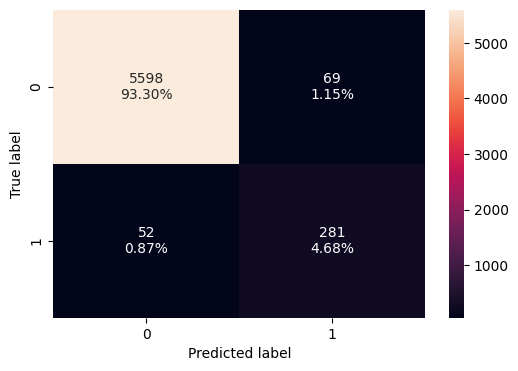

In [48]:
# Create confusion matrix
confusion_matrix_sklearn(ada_over_tuned, X_val, y_val)

- The AdaBoost Model with hyperparameter tuning and built based on oversampled data tends to overfit.

### Tuning for logistic regression model with oversampled data

In [49]:
# defining model
model = LogisticRegression(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'C': np.arange(0.1,1.1,0.1)}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1, verbose=2)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters are {'C': 0.2} with CV score=0.8920823693264202:


In [50]:
# Build the model based on best parameters
log_over_tuned = LogisticRegression(
    random_state=1,
    C=0.2
)

# Fit the model using training data
log_over_tuned.fit(X_train_over,y_train_over)

LogisticRegression(C=0.2, random_state=1)

In [51]:
# Check performance score on training data
log_over_tuned_train = model_performance_classification_sklearn(log_over_tuned, X_train_over, y_train_over)
log_over_tuned_train

,Accuracy,Recall,Precision,F1
0,0.885616,0.891931,0.880807,0.886334


In [52]:
# Check performance score on validation data
log_over_tuned_val = model_performance_classification_sklearn(log_over_tuned, X_val, y_val)
log_over_tuned_val

,Accuracy,Recall,Precision,F1
0,0.867833,0.84985,0.275828,0.416483


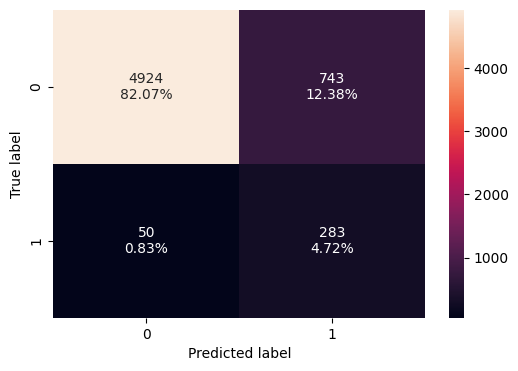

In [53]:
# Create confusion matrix
confusion_matrix_sklearn(log_over_tuned, X_val, y_val)

- The logistic regression model with hyperparameter tuning and built based on oversampled data is generalized on both training and validation data, but the recall value is not too high. We will check other models.

### Tuning method for Random Forest with undersampled data

In [54]:
# defining model
model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {"n_estimators": [200,250,300],
              "min_samples_leaf": np.arange(1, 4),
              "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
              "max_samples": np.arange(0.4, 0.7, 0.1)}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1, verbose=2)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters are {'n_estimators': 300, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.9047477253928868:


In [55]:
# Build the model based on best parameters
rf_un_tuned = RandomForestClassifier(
    random_state=1,
    n_estimators=300,
    min_samples_leaf=1,
    max_features='sqrt',
    max_samples=0.6
)

# Fit the model using training data
rf_un_tuned.fit(X_train_un,y_train_un)

RandomForestClassifier(max_samples=0.6, n_estimators=300, random_state=1)

In [56]:
# Check performance score on training data
rf_un_tuned_train = model_performance_classification_sklearn(rf_un_tuned, X_train_un, y_train_un)
rf_un_tuned_train

,Accuracy,Recall,Precision,F1
0,0.988417,0.978121,0.998686,0.988296


In [57]:
# Check performance score on validation data
rf_un_tuned_val = model_performance_classification_sklearn(rf_un_tuned, X_val, y_val)
rf_un_tuned_val

,Accuracy,Recall,Precision,F1
0,0.934,0.87988,0.451464,0.596741


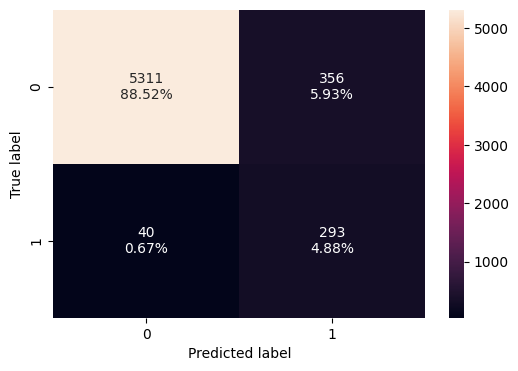

In [58]:
# Create confusion matrix
confusion_matrix_sklearn(rf_un_tuned, X_val, y_val)

- The hyperparameter tuned random forest model built with undersampled data tends to overfit. The recall value on validation data is lower than on the training data.

### Sample tuning method for XGBoost Model with undersampled data

In [59]:
# defining model
model = XGBClassifier(random_state=1, eval_metric="logloss")

# Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators': [150, 200, 250],
            'scale_pos_weight': [5,10],
            'learning_rate': [0.1,0.2],
            'gamma': [0,3,5],
            'subsample': [0.8,0.9]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1, verbose=2)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters are {'subsample': 0.8, 'scale_pos_weight': 10, 'n_estimators': 150, 'learning_rate': 0.1, 'gamma': 3} with CV score=0.9253515301902399:


In [60]:
# Build the model based on best parameters
xgb_un_tuned = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    n_estimators=150,
    scale_pos_weight=10,
    learning_rate=0.1,
    gamma=3,
    subsample=0.8
)

# Fit the model using training data
xgb_un_tuned.fit(X_train_un,y_train_un)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=150,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [61]:
# Check performance score on training data
xgb_un_tuned_train = model_performance_classification_sklearn(xgb_un_tuned, X_train_un, y_train_un)
xgb_un_tuned_train

,Accuracy,Recall,Precision,F1
0,0.994208,1.0,0.98855,0.994242


In [62]:
# Check performance score on validation data
xgb_un_tuned_val = model_performance_classification_sklearn(xgb_un_tuned, X_val, y_val)
xgb_un_tuned_val

,Accuracy,Recall,Precision,F1
0,0.851167,0.912913,0.260274,0.405063


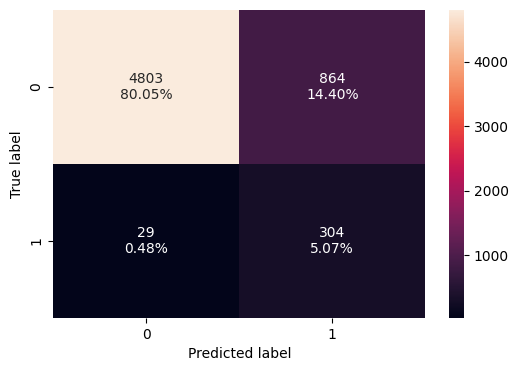

In [63]:
# Create confusion matrix
confusion_matrix_sklearn(xgb_un_tuned, X_val, y_val)

- The hyperparameter tuned XGBoost model built based on the undersampled data tends to overfit. It has recall value of 1 on the training data and 0.91 on the test data.

### Sample tuning method for GBM model with undersampled data

In [64]:
# defining model
model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {"n_estimators": np.arange(100,150,25),
              "learning_rate": [0.2, 0.05, 1],
              "subsample":[0.5,0.7],
              "max_features":[0.5,0.7]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1, verbose=2)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters are {'subsample': 0.7, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 0.05} with CV score=0.9047394540942928:


In [65]:
# Build the model based on best parameters
gbm_un_tuned = GradientBoostingClassifier(
    random_state=1,
    n_estimators=100,
    learning_rate=0.05,
    subsample=0.7,
    max_features=0.7
)

# Fit the model using training data
gbm_un_tuned.fit(X_train_un,y_train_un)

GradientBoostingClassifier(learning_rate=0.05, max_features=0.7, random_state=1,
                           subsample=0.7)

In [66]:
gbm_un_tuned_train = model_performance_classification_sklearn(gbm_un_tuned, X_train_un, y_train_un)
gbm_un_tuned_train

,Accuracy,Recall,Precision,F1
0,0.947233,0.920206,0.972789,0.945767


In [67]:
gbm_un_tuned_val = model_performance_classification_sklearn(gbm_un_tuned, X_val, y_val)
gbm_un_tuned_val

,Accuracy,Recall,Precision,F1
0,0.9205,0.870871,0.400552,0.548723


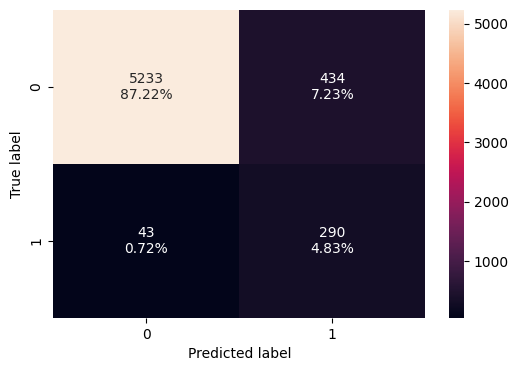

In [68]:
# Create confusion matrix
confusion_matrix_sklearn(gbm_un_tuned, X_val, y_val)

- The hyperparameter tuned GBM model built based on undersampled data also tends to overfit.

## Model performance comparison and choosing the final model

In [69]:
# Training data model performance comparison
models_train_comp_df = pd.concat(
    [
      ada_over_tuned_train.T,
      log_over_tuned_train.T,
      rf_un_tuned_train.T,
      xgb_un_tuned_train.T,
      gbm_un_tuned_train.T
    ],
    axis=1
)

models_train_comp_df.columns = [
    "Adaboost tuned with oversampling",
    "Logistic regression tuned with oversampling",
    "Random Forest tuned with undersampling",
    "XGBoost tuned with undersampling",
    "GBM tuned with undersampling"
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Adaboost tuned with oversampling,Logistic regression tuned with oversampling,Random Forest tuned with undersampling,XGBoost tuned with undersampling,GBM tuned with undersampling
Accuracy,0.993912,0.885616,0.988417,0.994208,0.947233
Recall,0.991001,0.891931,0.978121,1.000000,0.920206
Precision,0.996805,0.880807,0.998686,0.988550,0.972789
F1,0.993894,0.886334,0.988296,0.994242,0.945767


In [70]:
# Validation data model performance comparison
models_val_comp_df = pd.concat(
    [
      ada_over_tuned_val.T,
      log_over_tuned_val.T,
      rf_un_tuned_val.T,
      xgb_un_tuned_val.T,
      gbm_un_tuned_val.T
    ],
    axis=1
)

models_val_comp_df.columns = [
    "Adaboost tuned with oversampling",
    "Logistic regression tuned with oversampling",
    "Random Forest tuned with undersampling",
    "XGBoost tuned with undersampling",
    "GBM tuned with undersampling"
]

print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Adaboost tuned with oversampling,Logistic regression tuned with oversampling,Random Forest tuned with undersampling,XGBoost tuned with undersampling,GBM tuned with undersampling
Accuracy,0.979833,0.867833,0.934000,0.851167,0.920500
Recall,0.843844,0.849850,0.879880,0.912913,0.870871
Precision,0.802857,0.275828,0.451464,0.260274,0.400552
F1,0.822840,0.416483,0.596741,0.405063,0.548723


- All the models after hyperparameter tuning have overfitting features. Among all the models, GBM tuned with undersampled data has a high recall value on training data and is relatively generalized on both training and validation data at the same time. Its recall value on the training data is also higher than the models built without hyperparameter tuning. Therefore, we select this model as our final model.

### Test set final performance

In [71]:
# Check metrics on test data
gbm_un_tuned_test = model_performance_classification_sklearn(gbm_un_tuned, X_test, y_test)
gbm_un_tuned_test

,Accuracy,Recall,Precision,F1
0,0.9252,0.85461,0.419861,0.563084


- The model is still overfitted when comparing the recall value on training data to the recall value on testing data.

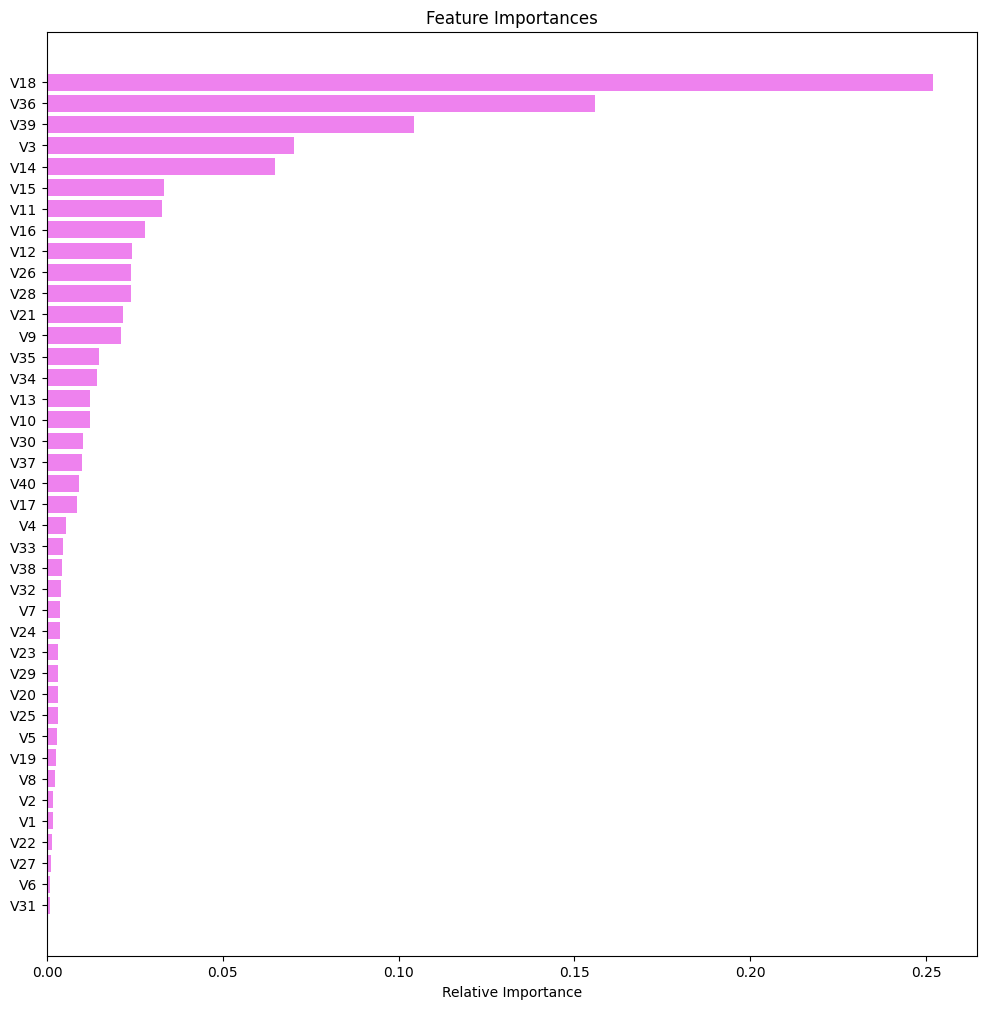

In [72]:
feature_names = X.columns
importances = gbm_un_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- V18, V36, V39 are the top three important features in the model. They are most important features in affecting the generating failure.

## Pipelines to build the final model


In [73]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy='median')),
        (
            "GBM",
            GradientBoostingClassifier(
            random_state=1,
            n_estimators=100,
            learning_rate=0.05,
            subsample=0.7,
            max_features=0.7
        ),
        ),
    ]
)

In [74]:
# Separate training data into target and other variables
X1 = df1.drop("Target", axis=1)
Y1 = df1["Target"]

# Separate test data into target and other variables
X_test1 = df_test1.drop("Target", axis=1)
Y_test1 = df_test1["Target"]

In [75]:
# Impute missing values in the training data
imputer = SimpleImputer(strategy="median")
X1 = imputer.fit_transform(X1)

# Under Sampling Technique
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X1_un, Y1_un = rus.fit_resample(X1, Y1)

# Fit the model on training data
model.fit(X1_un, Y1_un)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('GBM',
                 GradientBoostingClassifier(learning_rate=0.05,
                                            max_features=0.7, random_state=1,
                                            subsample=0.7))])

In [76]:
# Let's check the performance on test set
Model_test = model_performance_classification_sklearn(model, X_test1, Y_test1)
Model_test

,Accuracy,Recall,Precision,F1
0,0.9258,0.85461,0.422067,0.565064


- Our final model can give 92% accuracy and 85% recall value, which performs relatively well on the test data.

# Business Insights and Conclusions

- Through the EDA analysis, most of the 40 variables in the dataset follow the normal distribution. The data counts for failure and non-failure targets are imbalanced.
- Among all the machine learning models, oversampling and undersampling approaches help to generalize the model performance of recall score on both training and validation datasets compared to the originial data. Hyperparameter tuning slightly improves the model of recall score but the generalization is degraded.
- Our final model is the hyperparameter tuned GBM model built with undersampled dataset. The model gives a recall score of 0.92 on the training data and 0.87 on the validation data. The recall score on testing data is 0.85 through the pipeline. The accuracy score is 0.95 on training data, 0.92 on both validation and test datasets. These indicate that although this model is slightly overfitted, the performance is overall great. The model can detect 85% of the generator failure.
- Among all the model features in the final GBM model, V18, V36, and V39 are the top three important model features that can affect the detection of generator failure.
- To further improve the model predicability on the generator failure, more sophisticated machine learning model could be tried.

In [77]:
%%shell
jupyter nbconvert --to html '/content/drive/MyDrive/Colab Notebooks/Model Tuning/Project 6/MT_Project_LearnerNotebook_FullCode_MZ.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Model Tuning/Project 6/MT_Project_LearnerNotebook_FullCode_MZ.ipynb to html
[NbConvertApp] Writing 3301706 bytes to /content/drive/MyDrive/Colab Notebooks/Model Tuning/Project 6/MT_Project_LearnerNotebook_FullCode_MZ.html


***